<a href="https://colab.research.google.com/github/bindukovvada/Appliances_Energy_Prediction/blob/main/Bindu_Applicances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Appliances Energy Prediction</b>

#<b>Aim:  Data-driven prediction of energy use of appliances</b>

#The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column.


# <b>Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters)</b>

#<b>About the data:

### <b>The columns in the given dataset are as follows:</b>
###<b>date</b> - time year-month-day hour:minute:second
###<b>Appliances</b> - energy use in Wh (Dependent variable)
###<b>lights</b> -  energy use of light fixtures in the house in Wh (Drop this column)
###<b>T1</b> - Temperature in kitchen area, in Celsius
###<b>T2</b> - Temperature in living room area, in Celsius
###<b>T3</b> - Temperature in laundry room area, in Celsius
###<b>T4</b> - Temperature in office room, in Celsius
###<b>T5</b> - Temperature in bathroom, in Celsius
###<b>T6</b> - Temperature outside the building (north side), in Celsius
###<b>T7</b> - Temperature in ironing room , in Celsius
###<b>T8</b> - Temperature in teenager room 2, in Celsius
###<b>T9</b>,Temperature in parents room, in Celsius
###<b>To</b>, Temperature outside (from Chievres weather station), in Celsius 
###<b>RH1</b> - Humidity in kitchen area, in % 
###<b>RH2</b> - Humidity in living room area, in %
###<b>RH3</b> - Humidity in laundry room area, in %  
###<b>RH4</b> - Humidity in office room, in %
###<b>RH5</b> - Humidity in bathroom, in % 
###<b>RH6</b> - Humidity outside the building (north side), in %
###<b>RH7</b> - Humidity in ironing room, in %  
###<b>RH8</b> - Humidity in teenager room 2</b>, in %
###<b>RH9</b>  - Humidity in parents room, in %
###<b>Pressure</b> (from Chievres weather station), in mm 
###<b>Hg RHout</b> - Humidity outside (from Chievres weather station), in %
###<b>Wind speed</b> (from Chievres weather station), in m/s
###<b>Visibility</b> (from Chievres weather station), in km
###<b>Tdewpoint</b> (from Chievres weather station), Â°C
###<b>rv1</b> - Random variable 1, nondimensional
###<b>rv2</b> - Random variable 2, nondimensional

In [113]:
pip install scikit-optimize  #for skopt and skopt.space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from math import sqrt
from datetime import date
from scipy import stats
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')
from skopt.space import Real, Categorical, Integer

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')

In [162]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

# **Exploratory Data Analysis**

In [163]:
#Copying the dataset
energy_df = df

In [164]:
#Finding the size of the dataset
energy_df.shape

(19735, 29)

In [165]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [166]:
energy_df.describe(include='all')

date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4  ...            T9          RH_9         T_out  \
count   19735.000000  ...  19735.000000  19735.000000  19735.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean       20.855335  ...     19.485828     41.552401      7.411665   
std         2.042884  ...      2.014712      4.151497      5.317409   
min        15.100000  ...     14.890000     29.166667     -5.000000   
25%        19.530000  ...     18.000000     38.500000      3.666667   
50%        20.666667  ...     19.390000     40.900000      6.916667   
75%        22.100000  ...     20.600000     44.338095     10.408333   
max        26.200000  ...     24.500000     53.326667     26.100000   

         Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      755.522602     79.750418      4.039752     38.330834      3.760707   
std         7.399441     14.901088      2.451221     11.794719      4.194648   
min       729.300000     24.000000      0.000000      1.000000     -6.600000   
25%       750.933333     70.333333      2.000000     29.000000      0.900000   
50%       756.100000     83.666667      3.666667     40.000000      3.433333   
75%       760.933333     91.666667      5.500000     40.000000      6.566667   
max       772.300000    100.000000     14.000000     66.000000     15.500000   

                 rv1           rv2  
count   19735.000000  19735.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       24.988033     24.988033  
std        14.496634     14.496634  
min         0.005322      0.005322  
25%        12.497889     12.497889  
50%        24.897653     24.897653  
7

In [167]:
#Viewing all the columns
energy_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [168]:
#Finding Duplicate values
len(energy_df[energy_df.duplicated()])

0

No Duplicates found

In [169]:
#Finding Null values
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No Null values found

In [170]:
#dropping the light column
energy_df.drop('lights', axis=1, inplace=True)

In [171]:
#Storing the target column into a variable
Dependent_variable = energy_df['Appliances']


In [172]:
#Storing all independent columns into a variable
Independent_variables = energy_df.drop(['Appliances'], axis = 1)


In [173]:
#Change dtype of 'date' column and extracting the date column
energy_df['date'] = pd.to_datetime(energy_df['date'])
energy_df['months'] = energy_df['date'].dt.month
energy_df['hour'] = energy_df['date'].dt.hour
energy_df['week'] = energy_df['date'].dt.week
energy_df['weekday'] = energy_df['date'].dt.weekday

#Which month the Energy Consumption is high?

In [174]:
date= energy_df.groupby(df.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

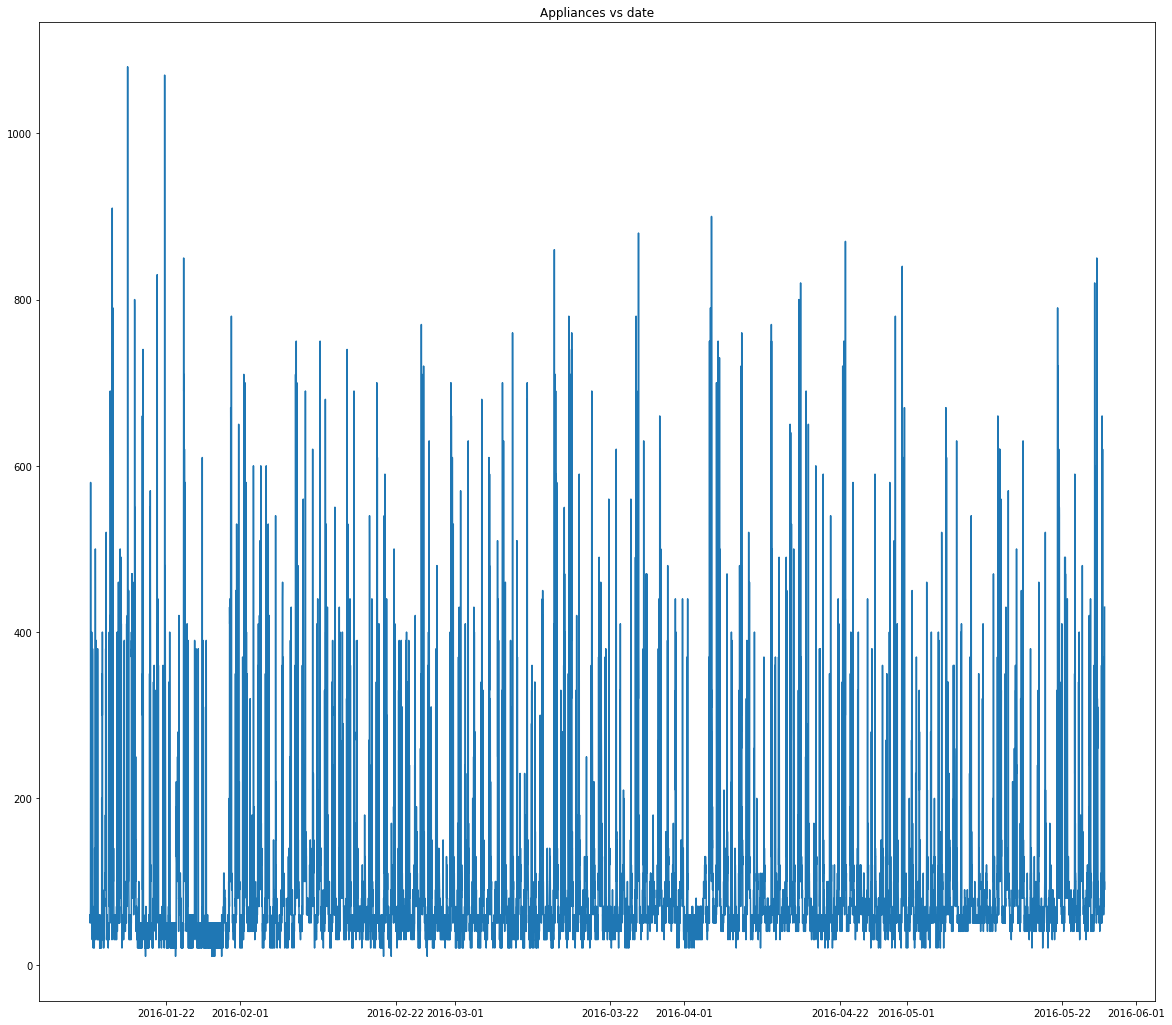

In [175]:
#Find the graph between Appliances and the date column
plt.figure(figsize=(20,18))
plt.plot(energy_df['date'], energy_df['Appliances'])
plt.title('Appliances vs date')
plt.show()


We can see that appliances consuming more energy in the march month when compared to the remaining months

#Which month Pressure is high?

In [181]:
date= energy_df.groupby(energy_df.months)["Press_mm_hg"].sum().sort_values(ascending=False)
date

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

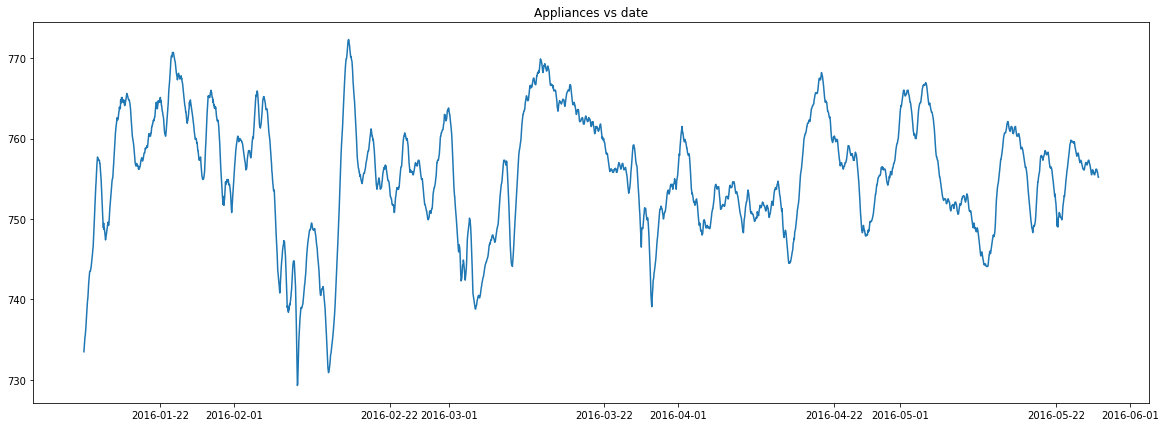

In [144]:
#Find the graph between Energy consumption and the pressure
plt.figure(figsize=(20,7))
plt.plot(energy_df['date'], energy_df['Press_mm_hg'])
plt.title('Appliances vs date')
plt.show()

We can cleary see that the pressure is high and also energy consumption is high in the month of March.

#Which month windspeed is high?

In [180]:
date = energy_df.groupby(energy_df.months)["Windspeed"].sum().sort_values(ascending=False)
date

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

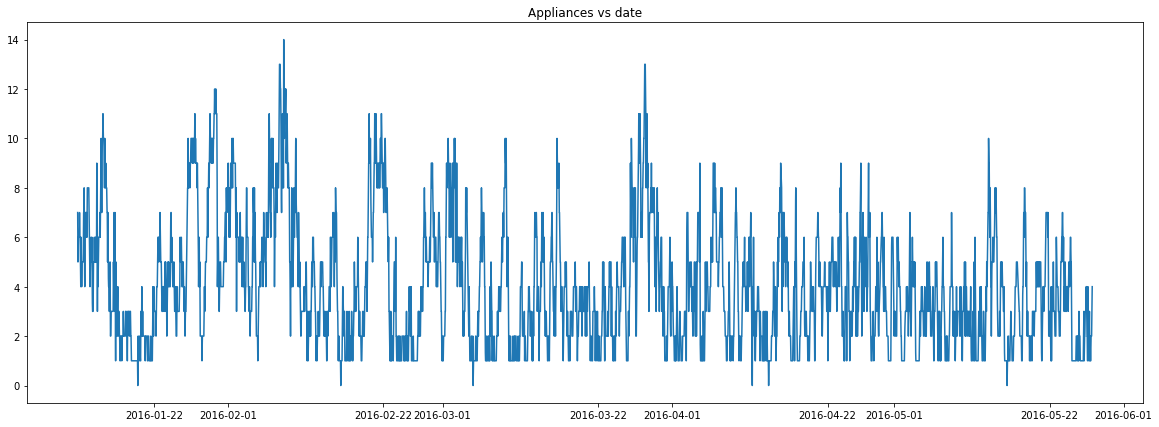

In [145]:
#Find the graph between Energy consumption and the windspeed
plt.figure(figsize=(20,7))
plt.plot(energy_df['date'], energy_df['Windspeed'])
plt.title('Appliances vs date')
plt.show()

Windspeed is high in the month of February which is not relating to Target variable



#Which day in a week the Energy Consumption is high?

In [179]:
weekday = energy_df.groupby(energy_df.weekday)["Appliances"].sum().sort_values(ascending=False)
weekday

weekday
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

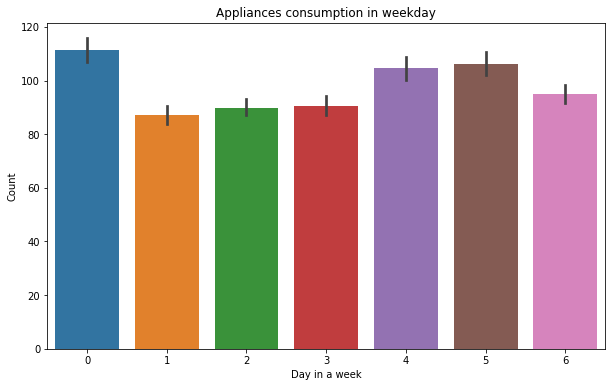

In [130]:
#Checking on which day the consumption is high
fig = plt.figure(figsize=(10, 6))
a=sns.barplot(x = energy_df['weekday'], y = energy_df['Appliances'])
a.set_title('Appliances consumption in weekday')
a.set_xlabel("Day in a week") 
a.set_ylabel('Count')
plt.show()

From the above bar chart, we can see that the energy consumption is high on sundays

#Now, Lets combine related variables and check with the target variable

##Compare the target variable with all the Temperature columns




In [203]:
temp_column = energy_df[['T1','T2','T3','T4','T5', 'T6','T7','T8','T9']]

In [215]:
def line_plot(features):
 plt.figure(figsize=(20,8))
 for i in features:
    sns.lineplot(energy_df['Appliances'],temp_column[i], label = i)
    plt.ylabel("Energy Consumption")
    plt.title('Inside temperature vs the energy consumption')
 plt.show()

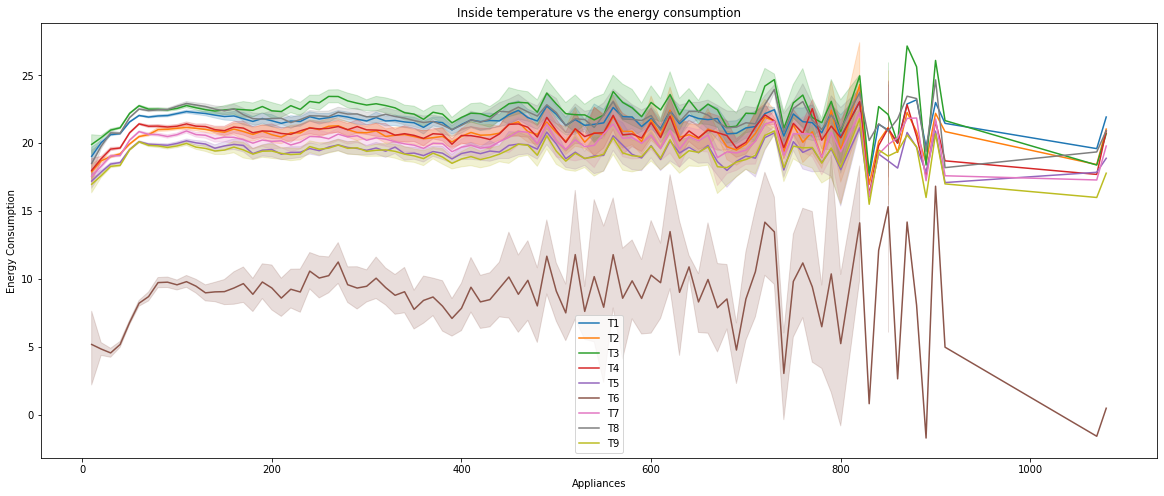

In [216]:
features=temp_column.columns
line_plot(features)

T6 is the temperature outside the building, which varies due to pressure and windspeed. The rest of the temperatures are almost same.

##Compare the target variable with all the Humidity columns


In [219]:
humidity_column = energy_df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

In [222]:
def line_plot(features):
 plt.figure(figsize=(20,8))
 for i in features:
    sns.lineplot(energy_df['Appliances'], humidity_column[i], label = i)
    plt.ylabel("Energy Consumption")
    plt.title('Humidity vs the energy consumption')
 plt.show()

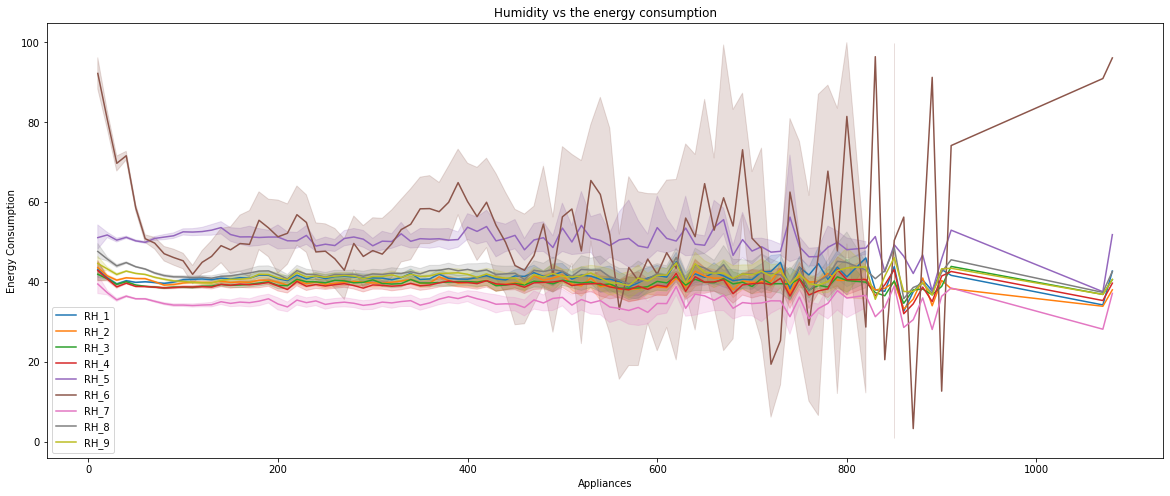

In [224]:
features=humidity_column.columns
line_plot(features)

T6 is the temperature outside the building, which varies due to pressure and windspeed. The rest of the temperatures are almost same.

##Compare the target variable with all the other features calculated by the weather station

In [225]:
weather_station_column = energy_df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint']]

In [226]:
def line_plot(features):
 plt.figure(figsize=(20,8))
 for i in features:
    sns.lineplot(energy_df['Appliances'], weather_station_column[i], label = i)
    plt.ylabel("Energy Consumption")
    plt.title('Features detected through weather station vs the Appliances energy consumption')
 plt.show()

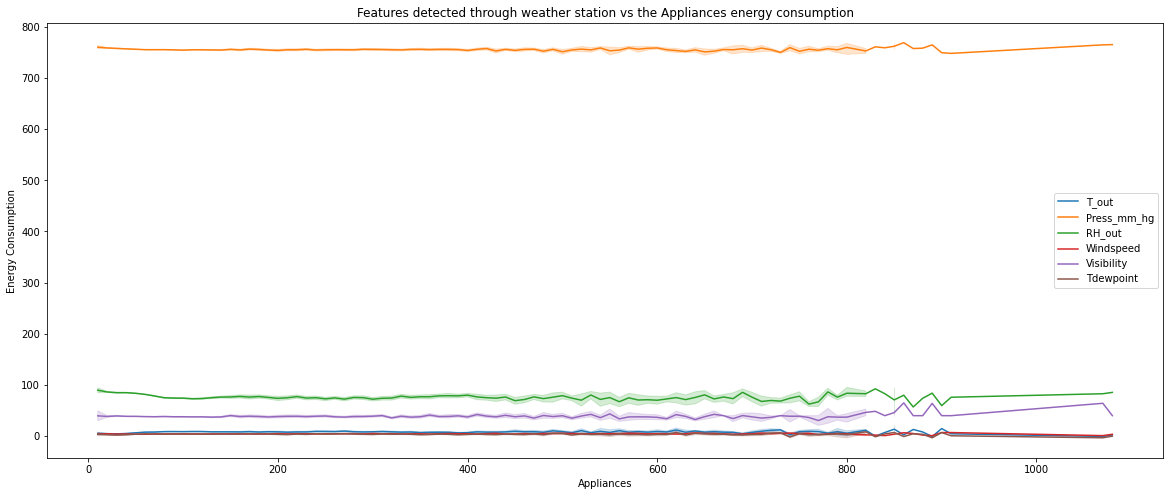

In [227]:
features=weather_station_column.columns
line_plot(features)

All the features have the constant values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


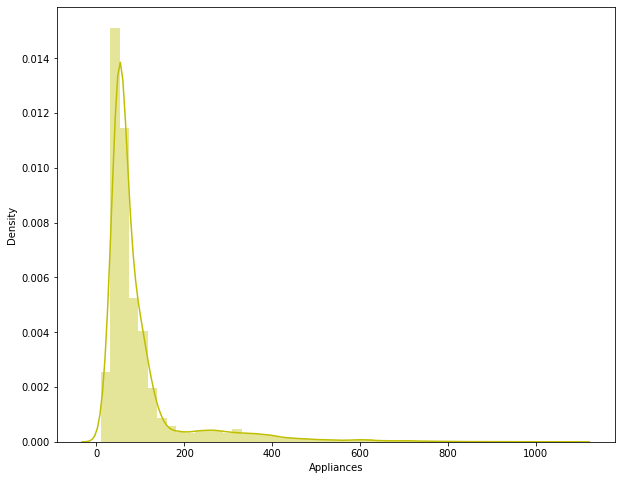

In [20]:
#Checking the distribution of Dependent varibale 'Appliances'
plt.figure(figsize = (10,8))
sns.distplot(energy_df['Appliances'], color = 'y')

Here, we can see that it is right skewed. So, we are doing log transformation in the next step 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


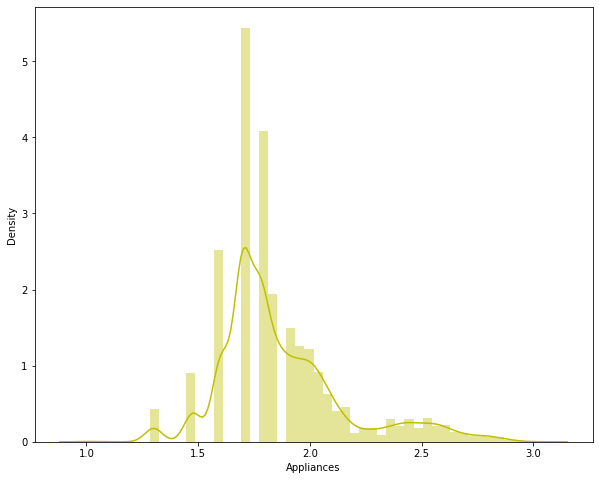

In [21]:
#Apply log transformation to the dependent variable to check if it is normally distributed or not
plt.figure(figsize = (10,8))
sns.distplot(np.log10(energy_df['Appliances']),color = 'y')

Now it is normally distributed 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

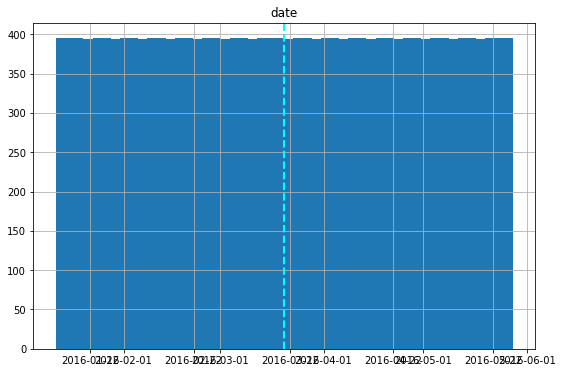

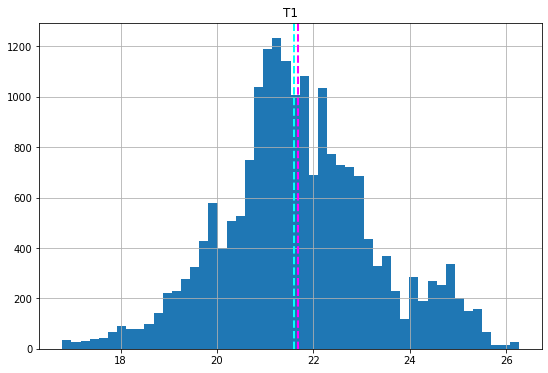

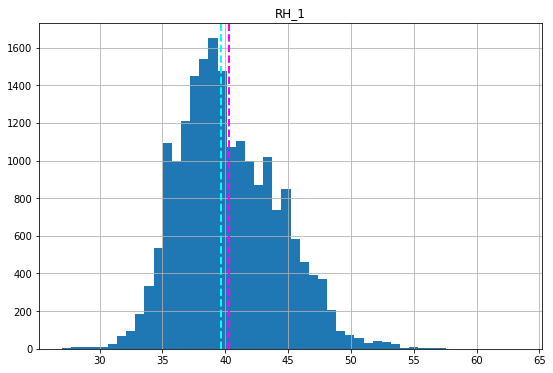

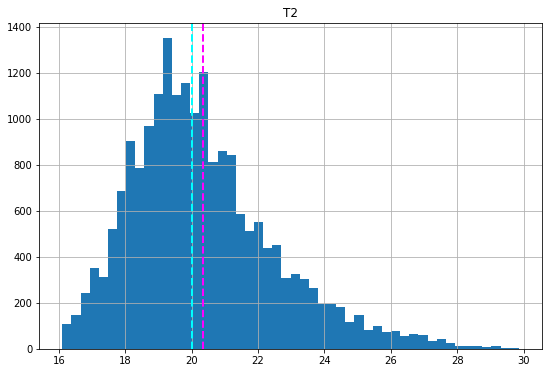

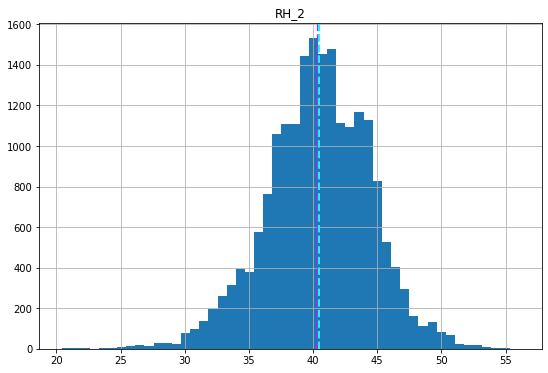

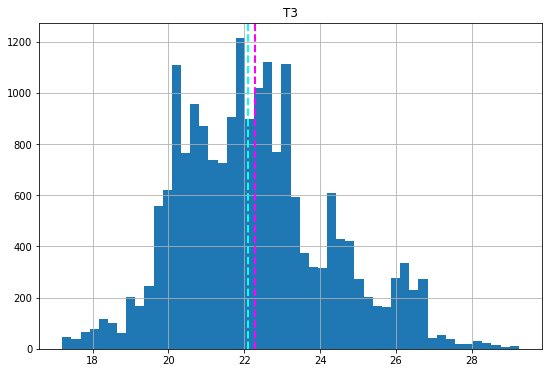

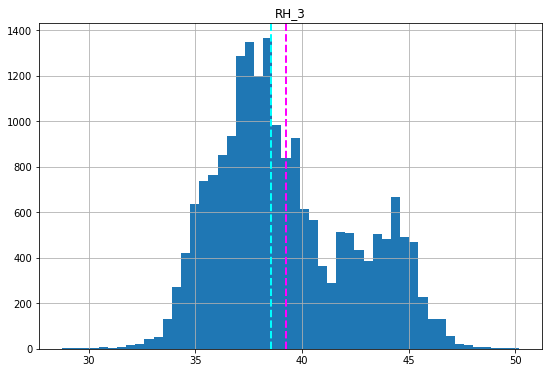

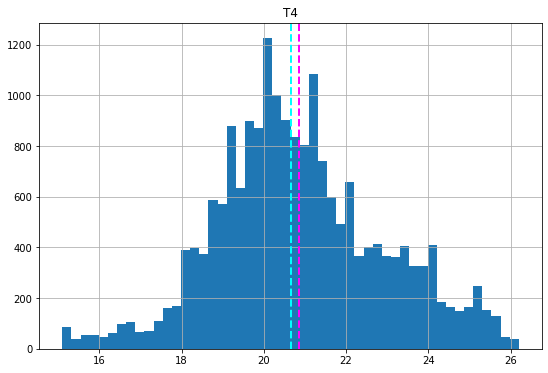

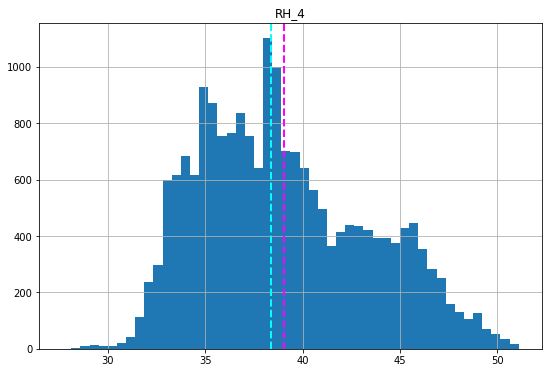

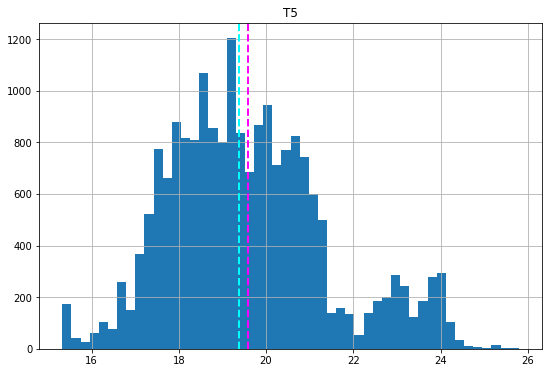

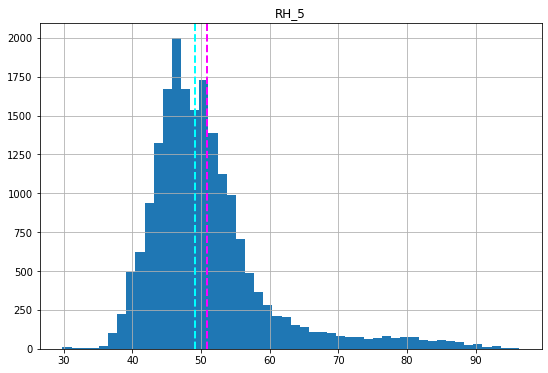

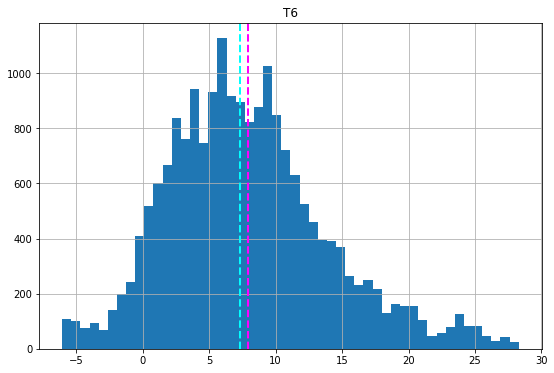

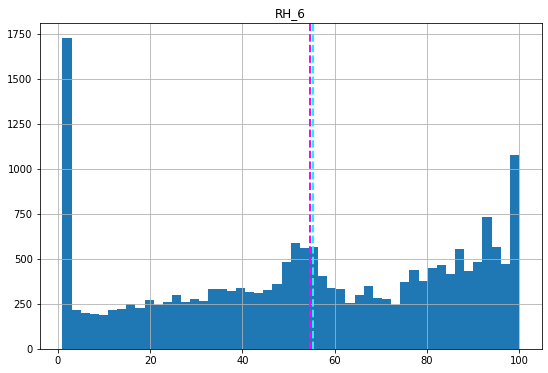

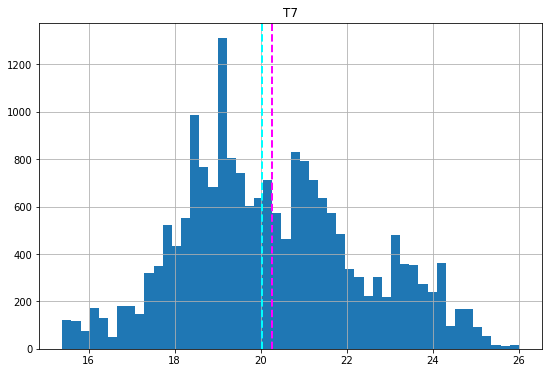

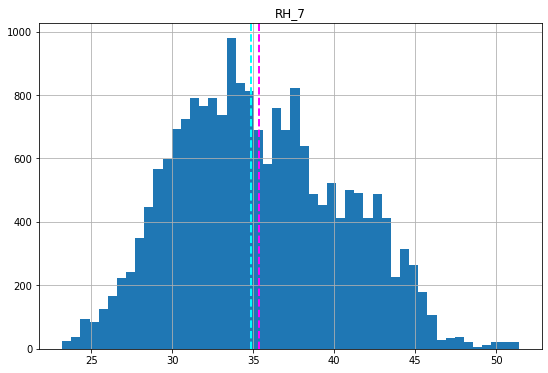

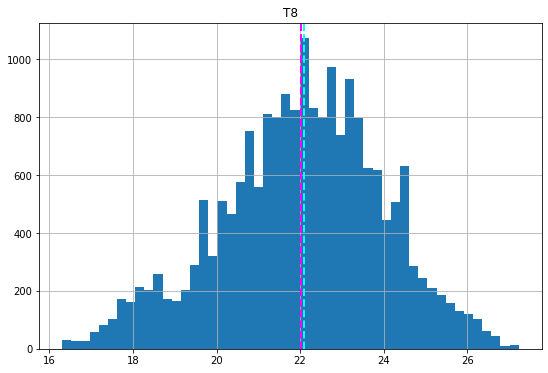

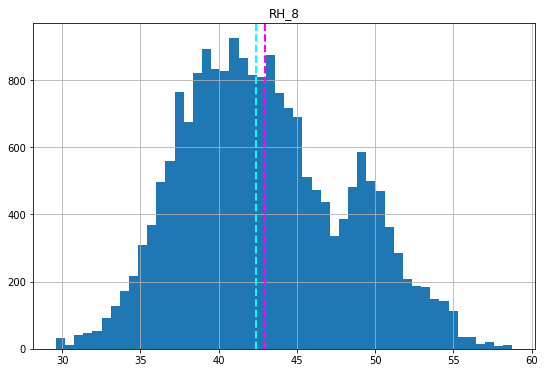

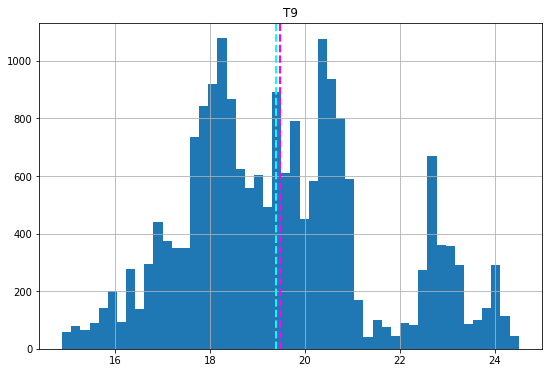

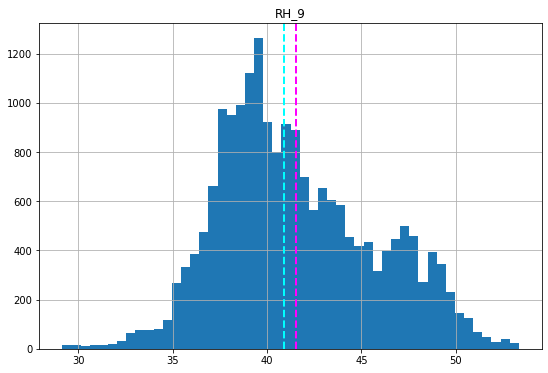

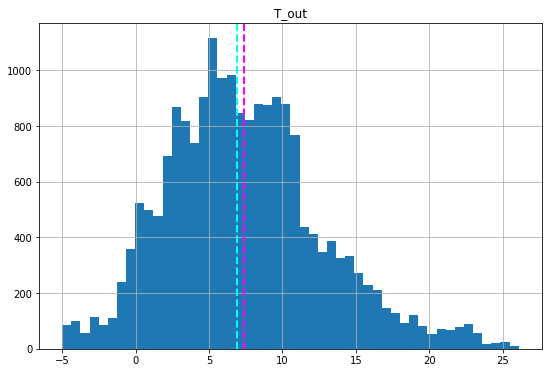

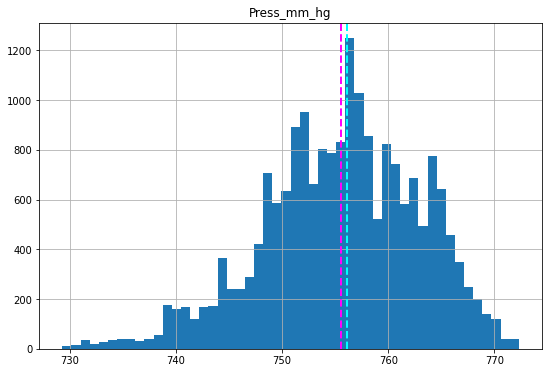

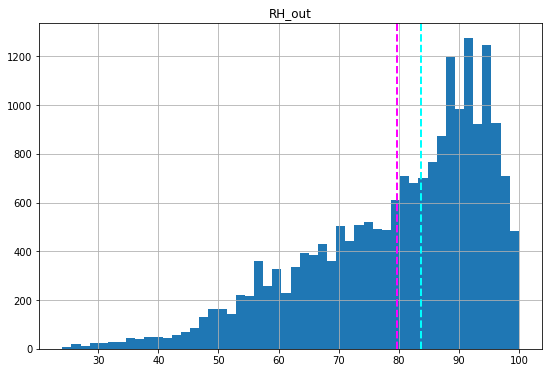

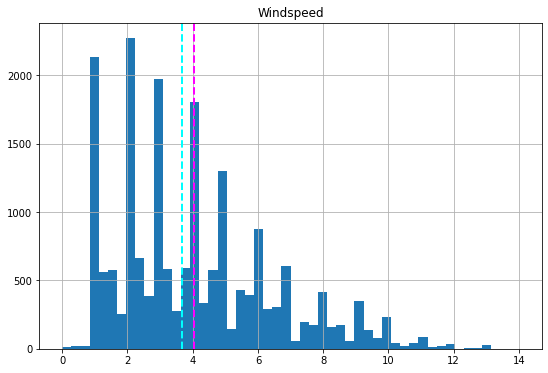

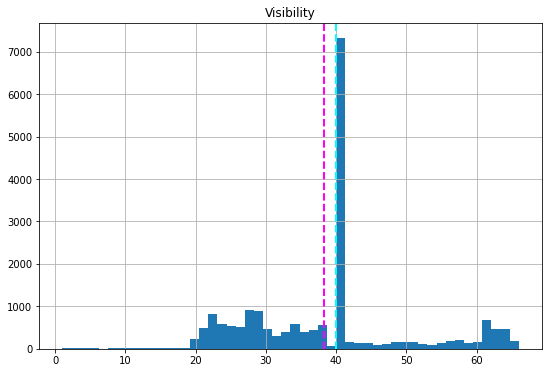

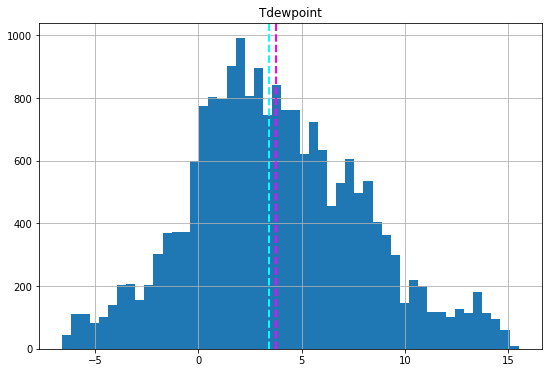

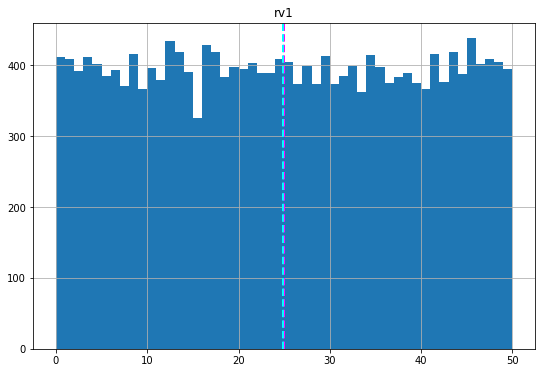

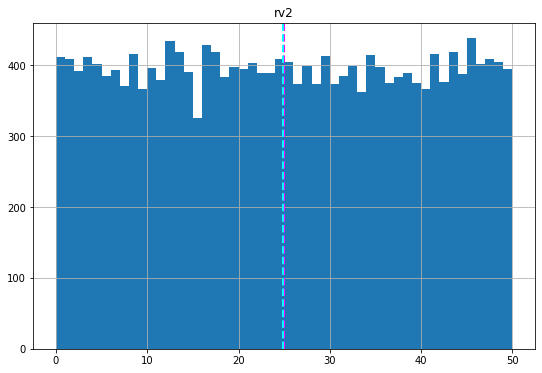

In [22]:
# plot a bar plot for each independent variable to check whether they are normally distributed or not
for col in Independent_variables[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [23]:
numeric_features = energy_df.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'months', 'hour', 'week', 'weekday'],
      dtype='object')

#Check relation between Independent variables with target variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

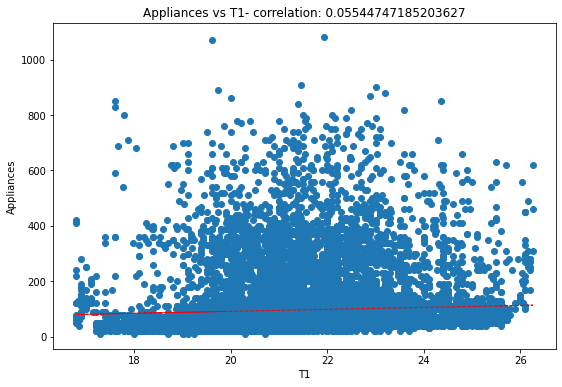

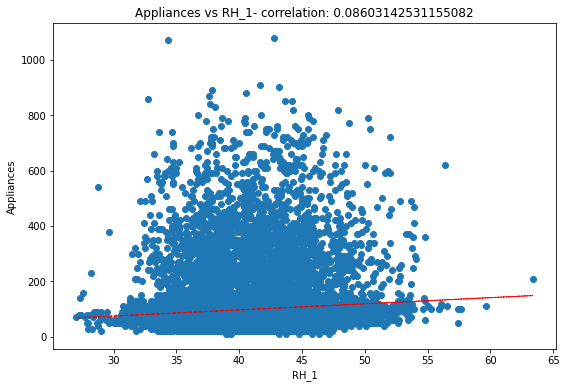

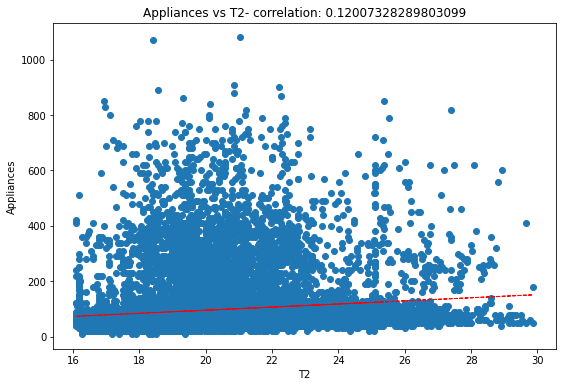

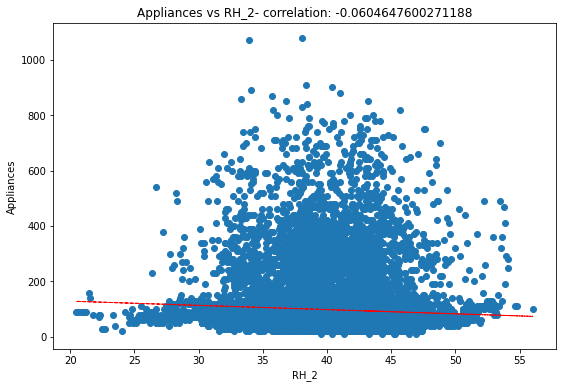

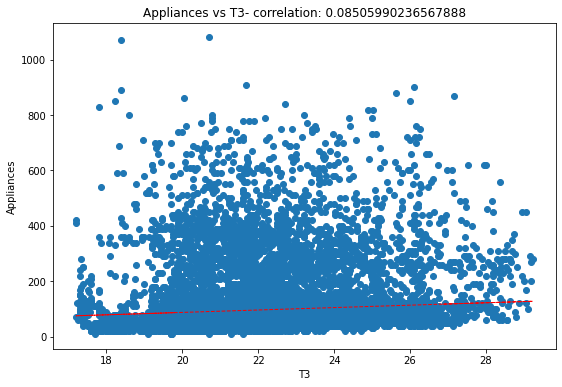

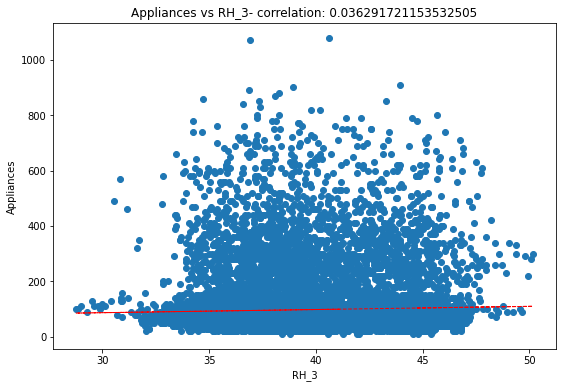

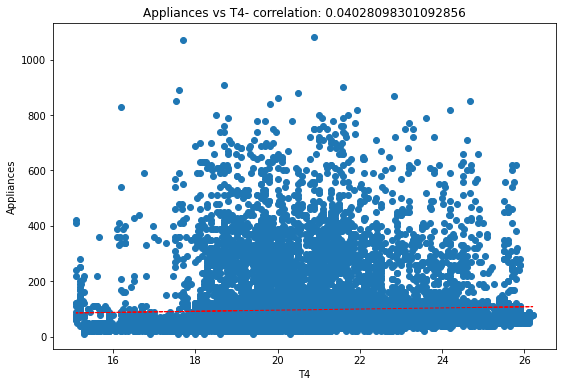

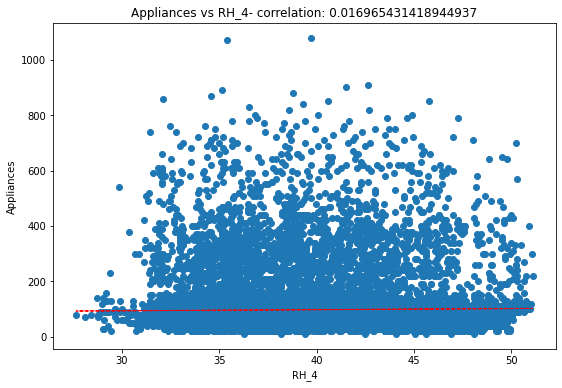

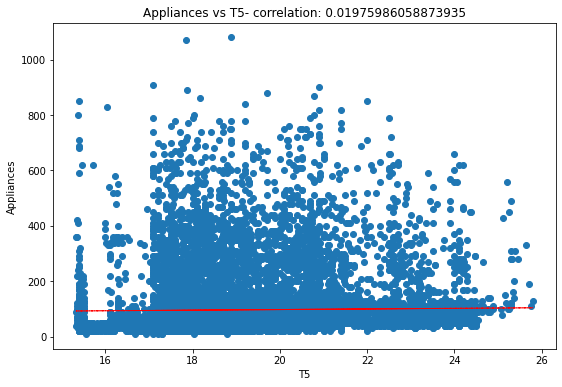

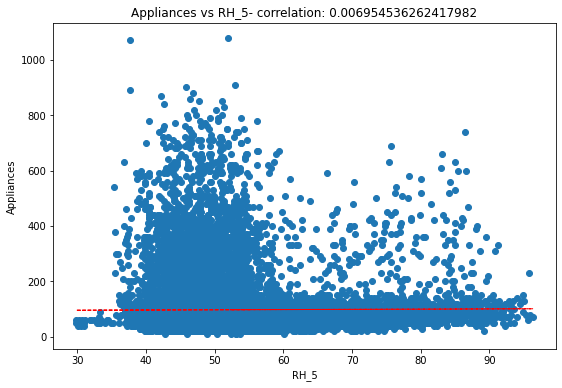

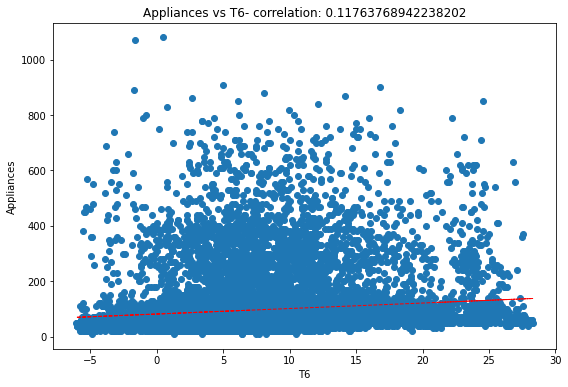

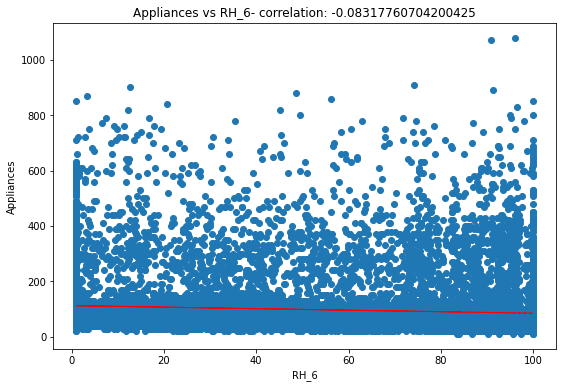

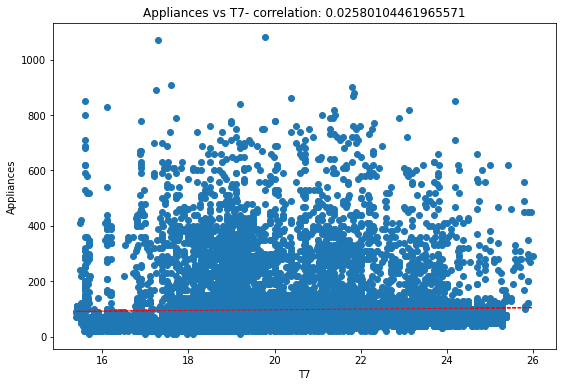

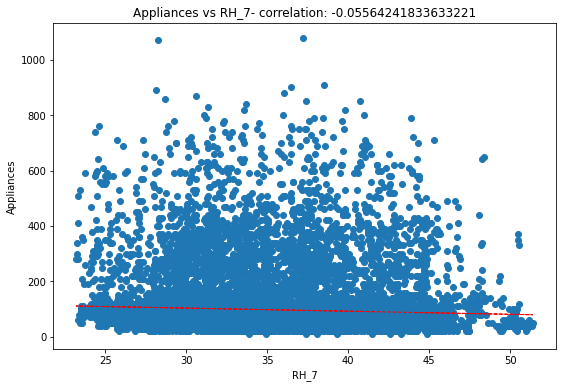

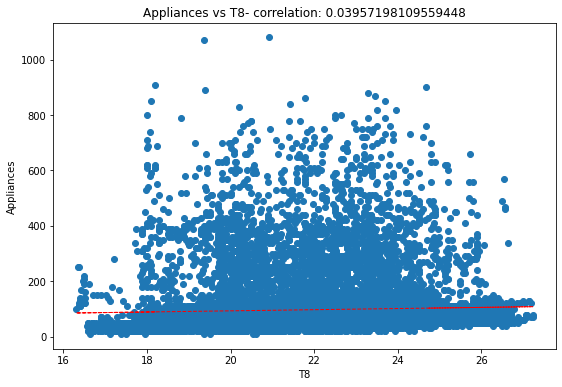

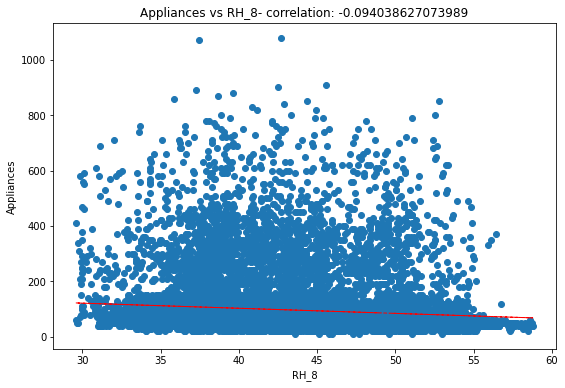

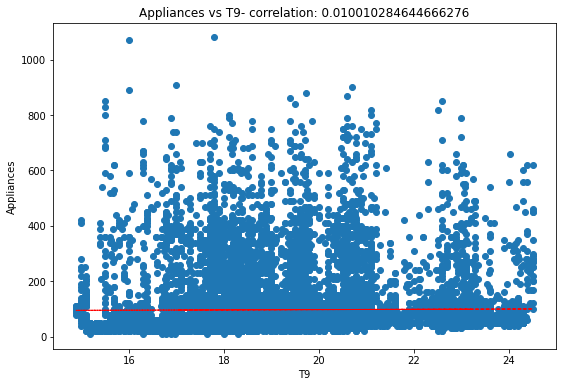

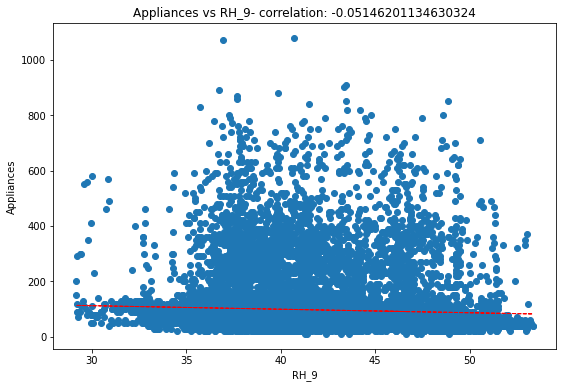

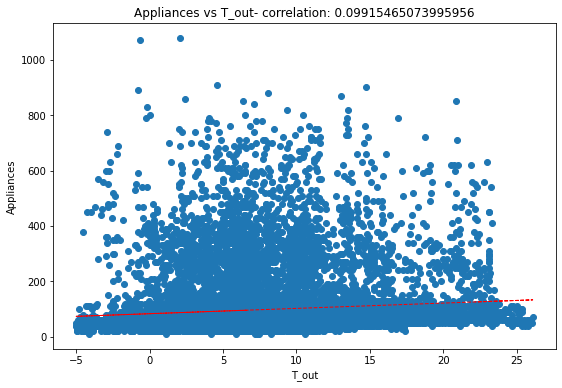

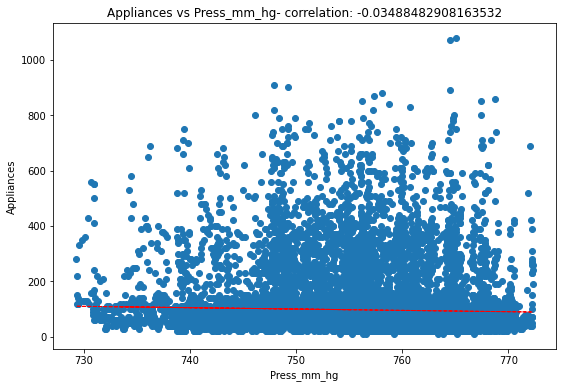

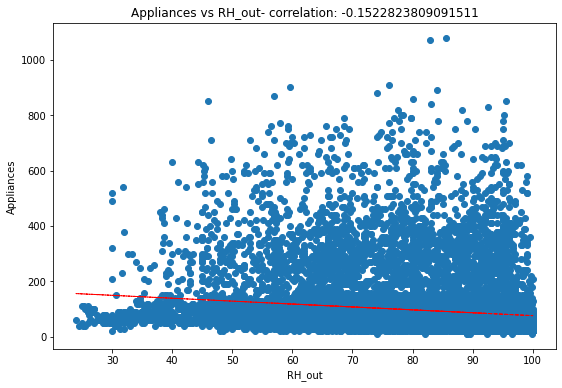

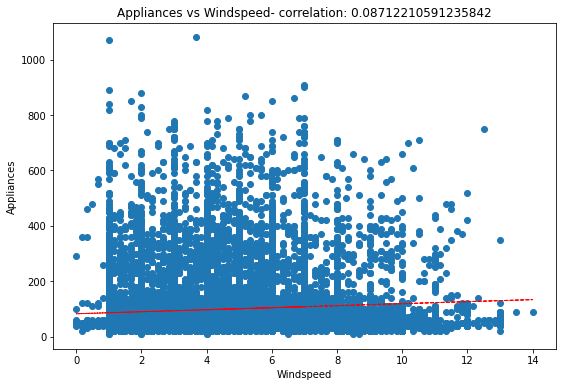

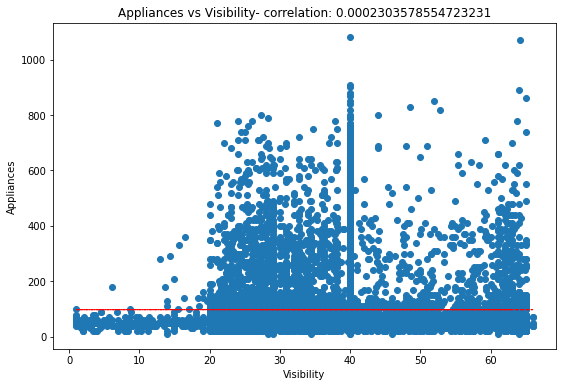

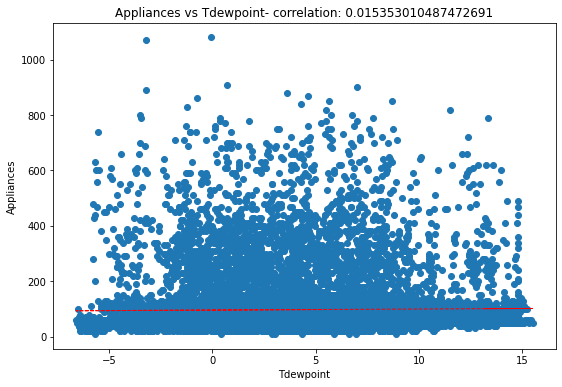

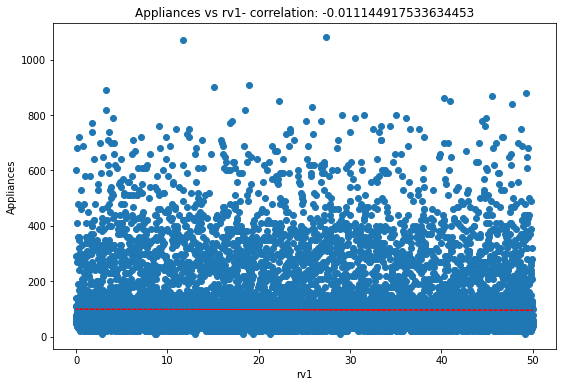

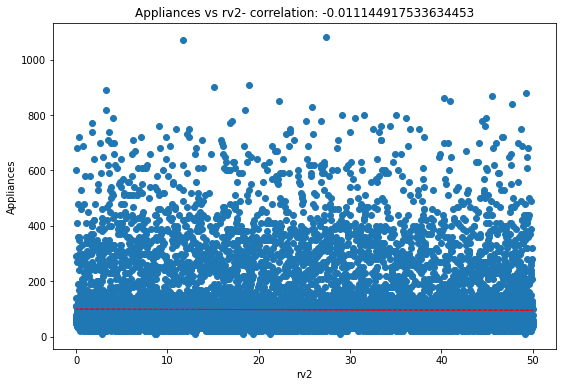

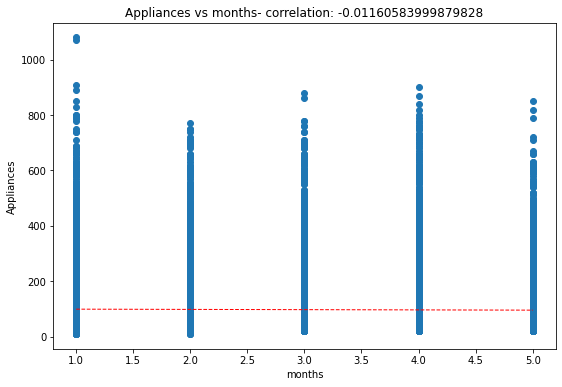

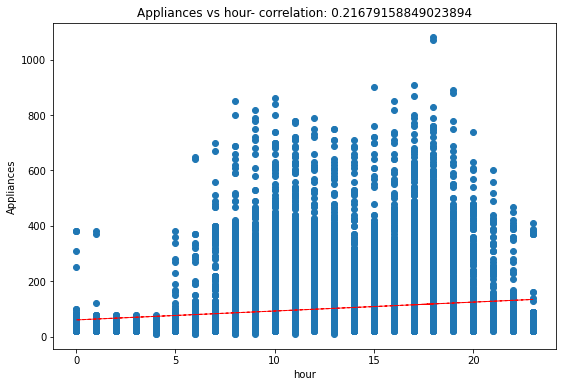

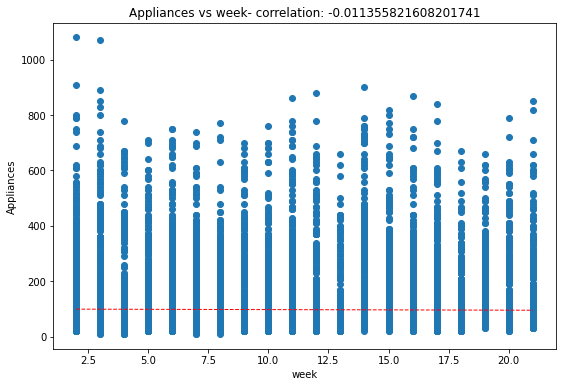

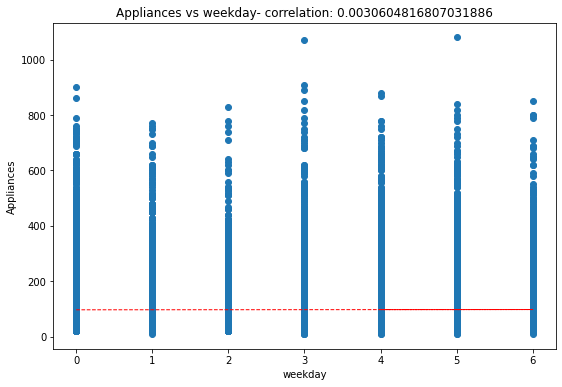

In [24]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy_df[col]
    label = energy_df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energy_df[col], energy_df['Appliances'], 1)
    y_hat = np.poly1d(z)(energy_df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# **Feature Selection**

In [229]:
#dropping the date column
energy_df.drop('date', axis=1, inplace=True)

#Feature selection using F-Regression

In [230]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [231]:
energy_df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'months', 'hour', 'week', 'weekday'],
      dtype='object')

In [237]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [238]:
f_scores = f_regression(X, Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130299e+00,
        7.70780063e+00, 9.54444046e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934202e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65245939e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        2.54499098e+00, 1.84831825e-01]),
 array([6.44916930e-015, 9.63943146e-034, 2.78494653e-064, 1.87302217e-017,
        5.08641648e-033, 3.40254021e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345129e-003, 3.28602654e-001, 9.33386716e-062, 1.20948068e-031,
        2.89030224e-004, 5.18729570e-015, 2.68310259e-008, 5.21156624e-040,
        1.59663524e-001, 4.69710927e-013, 2.62485380e-044, 9.49392222e-007,
        1.07751629e-102, 1.45647106e-034, 9.74185818e-001, 3.10211263e-002

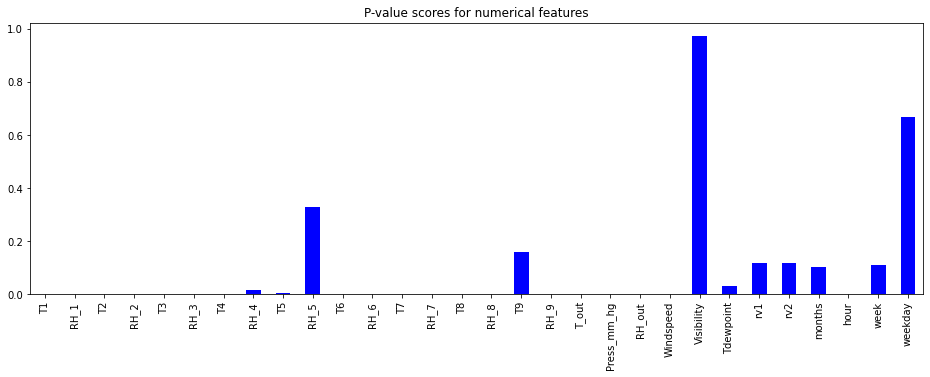

In [239]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

Drop these columns RH_4,T5,RH_5,T9,Visibility,Tdewpoint,rv1,rv2,months,week,weekday

In [ ]:
#Dropping these 10 columns
energy_df.drop(['RH_4','RH_5','T9','T5','Visibility','Tdewpoint','months','rv1','rv2','weekday','week'],axis=1,inplace=True)

In [246]:
energy_df.shape

(19735, 20)

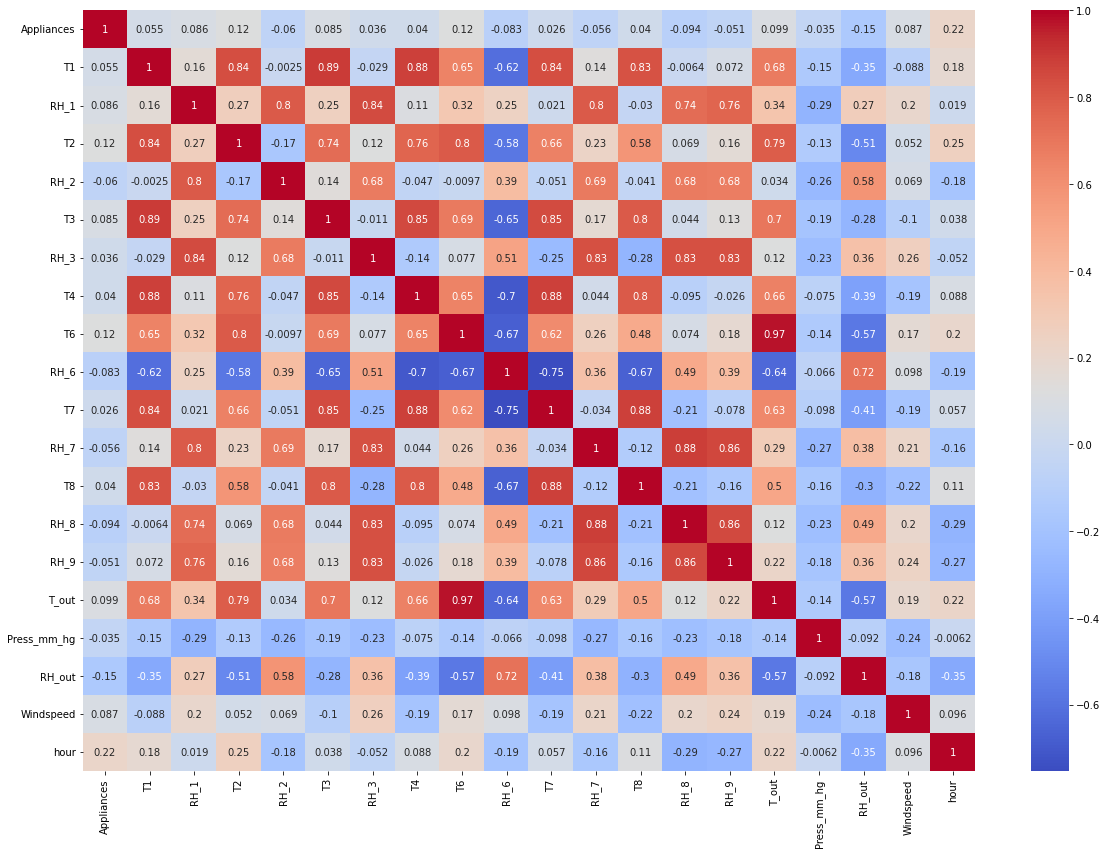

In [247]:
## Correlation
plt.figure(figsize=(20,14))
correlation = energy_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

We can see that there is Multicollinearity

In [248]:
correlation.Appliances

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
hour           0.216792
Name: Appliances, dtype: float64

##Checking multicollearity with vif method 

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [250]:
calc_vif(energy_df[[i for i in energy_df.describe().columns if i not in ['Appliances']]])

variables          VIF
0            T1  3461.087523
1          RH_1  1641.227515
2            T2  2198.176771
3          RH_2  1856.782757
4            T3  1117.693053
5          RH_3  1452.686430
6            T4   786.282992
7            T6    86.857740
8          RH_6    35.846741
9            T7  1074.777280
10         RH_7   466.099856
11           T8   952.267011
12         RH_8   602.476366
13         RH_9   639.486871
14        T_out    95.363393
15  Press_mm_hg   613.971838
16       RH_out   186.715756
17    Windspeed     5.115318
18         hour     7.042596

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

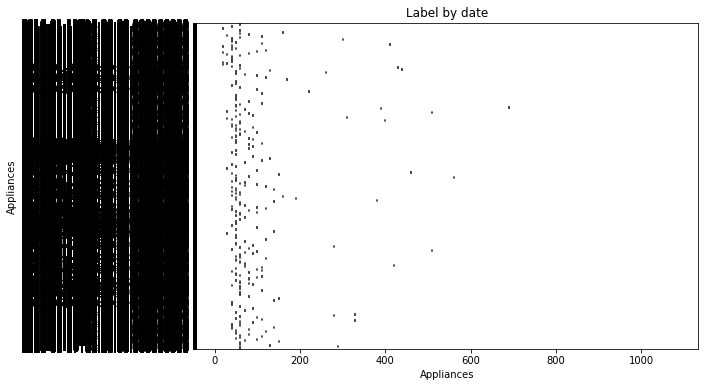

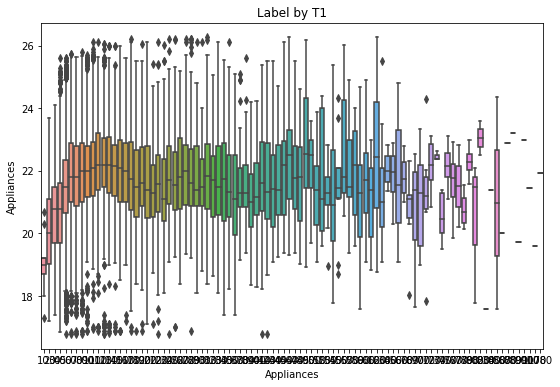

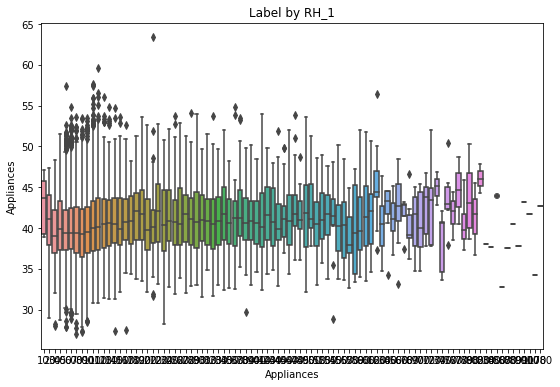

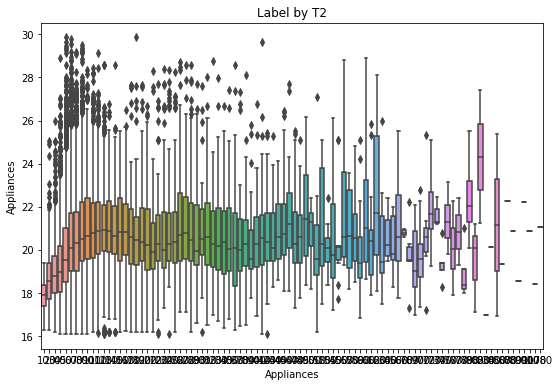

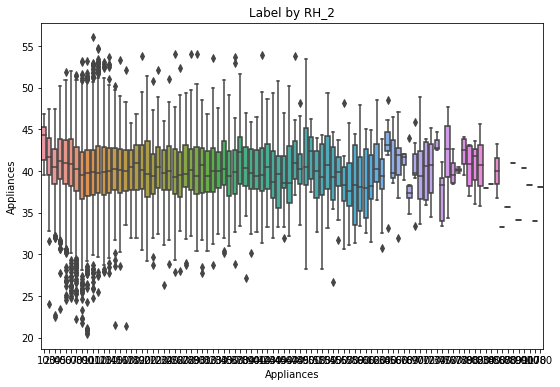

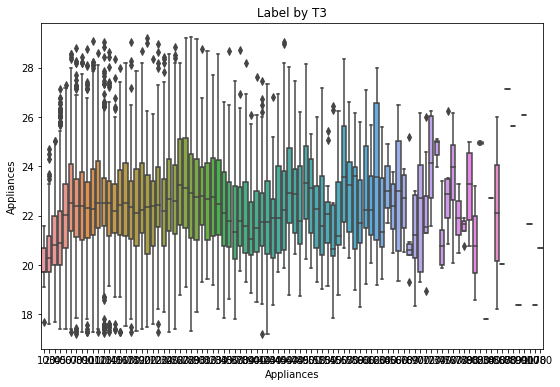

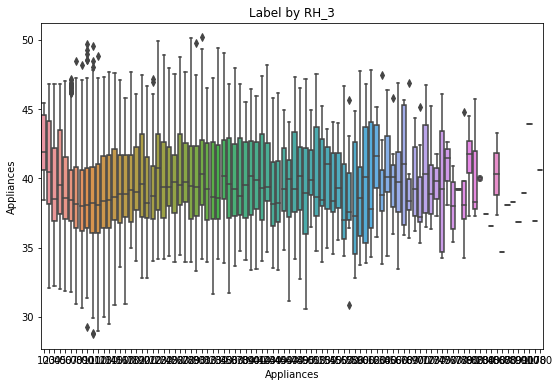

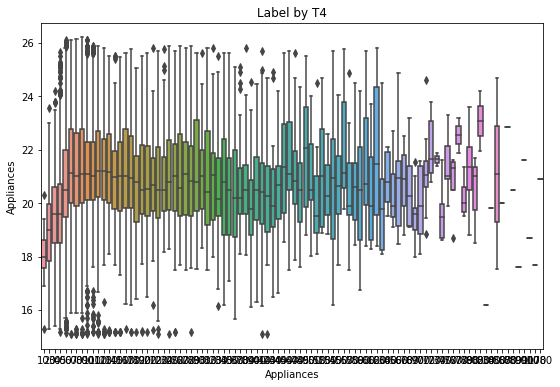

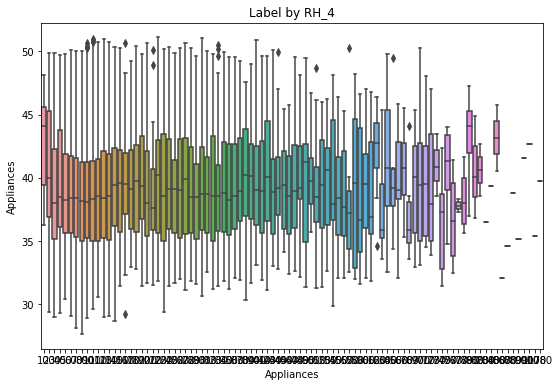

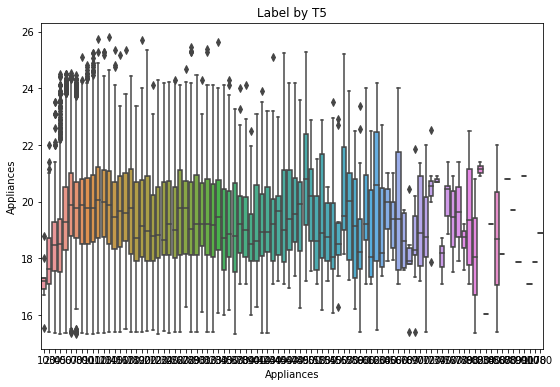

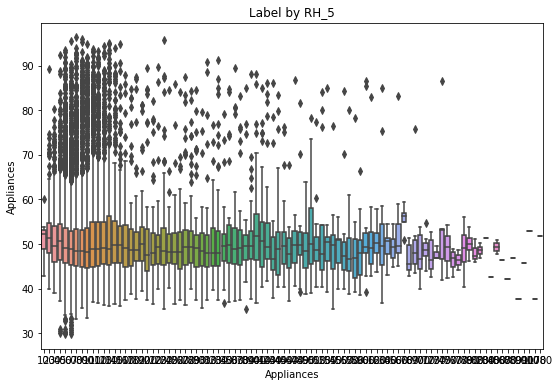

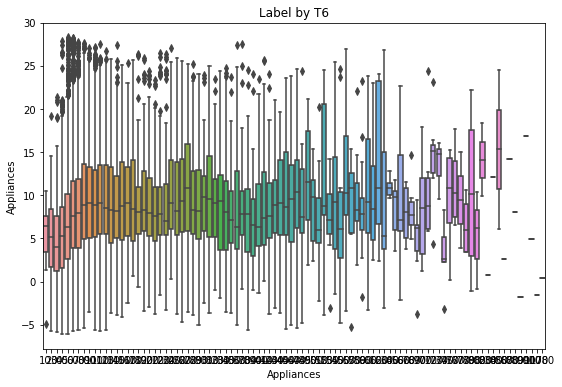

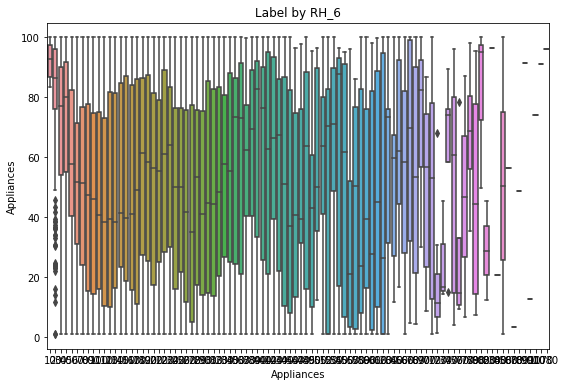

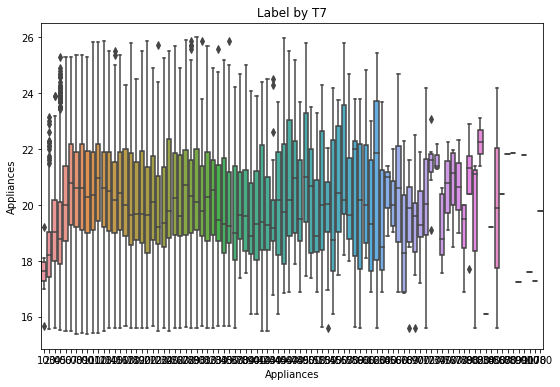

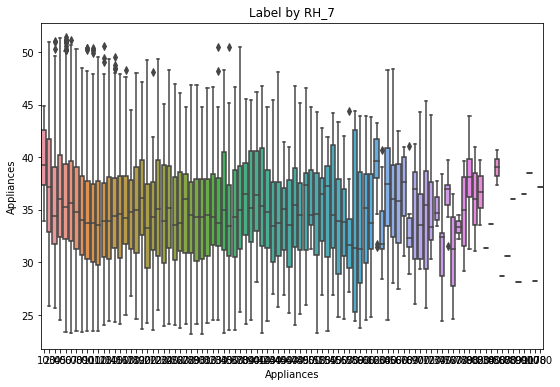

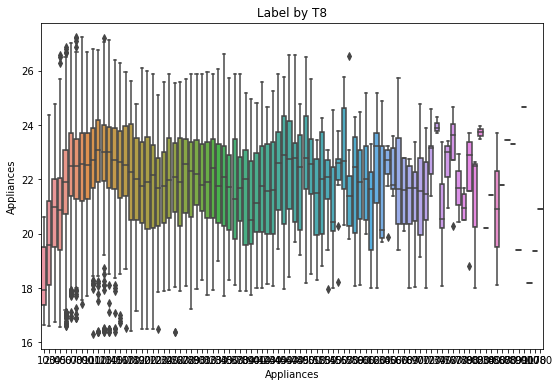

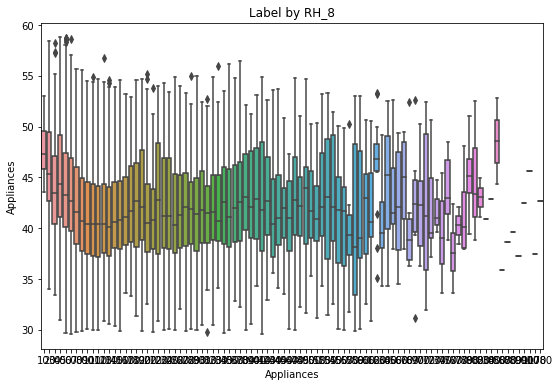

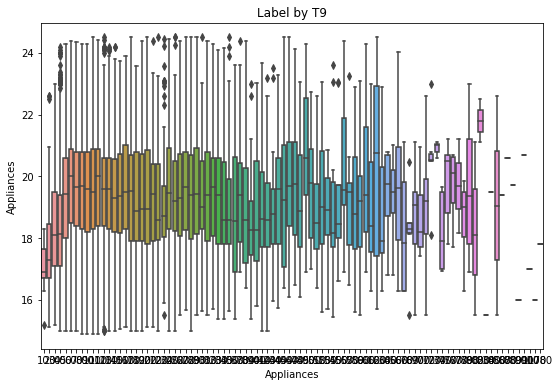

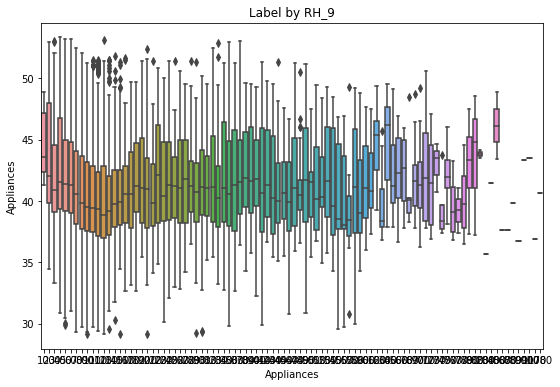

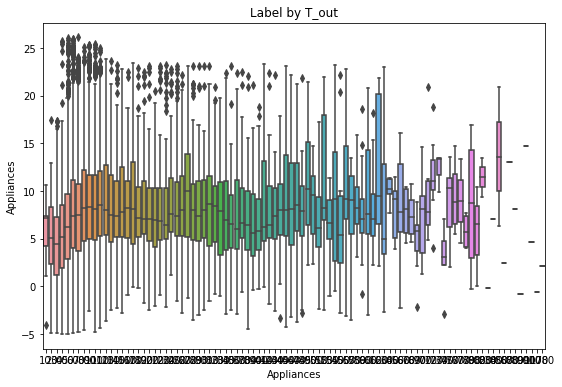

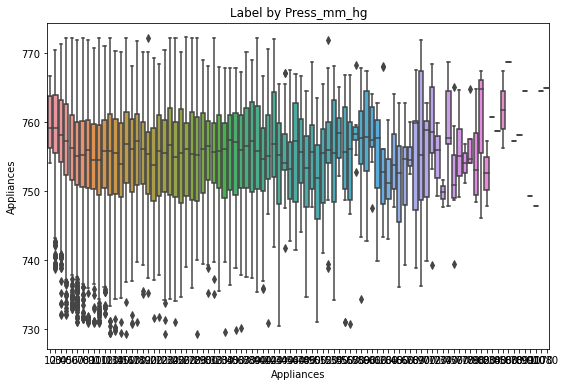

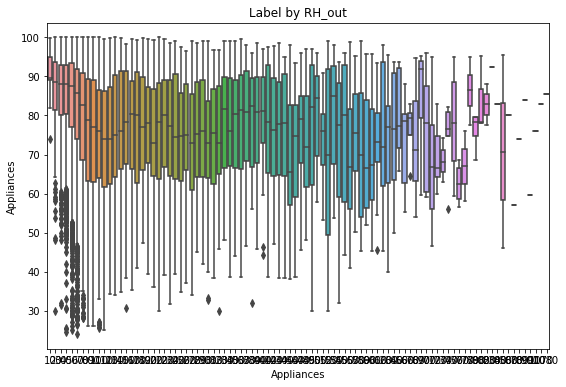

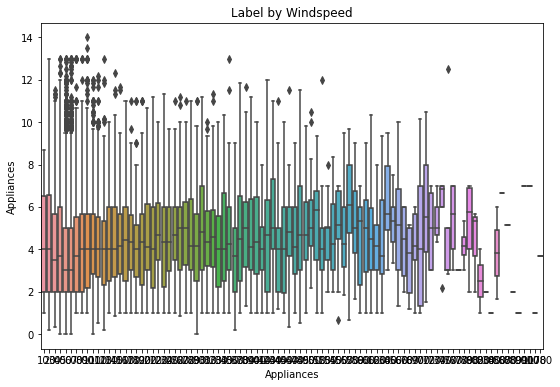

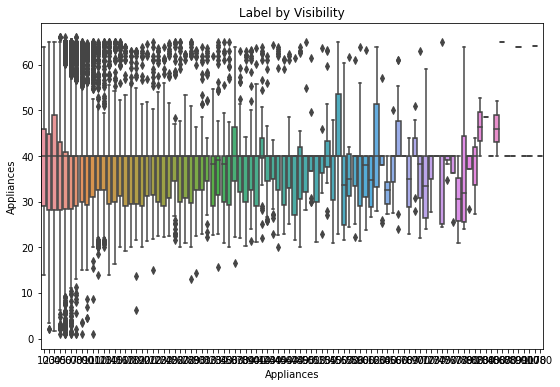

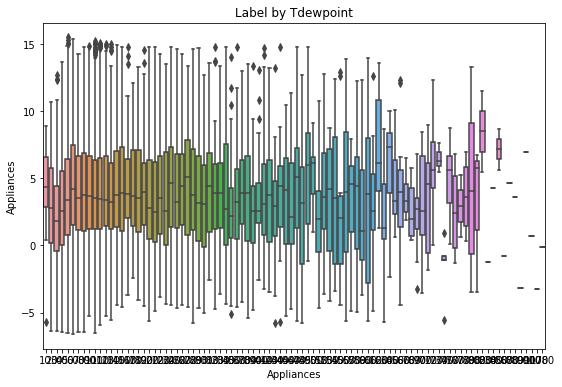

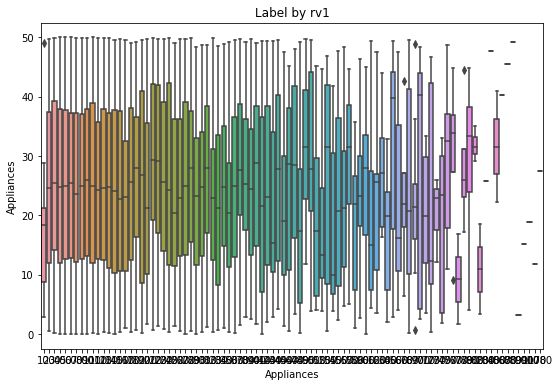

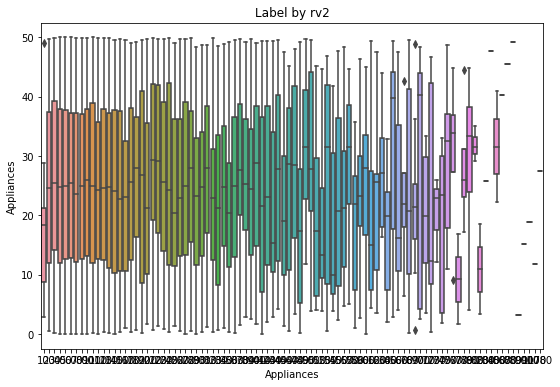

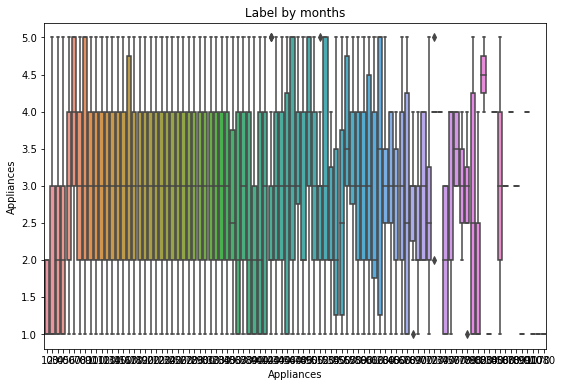

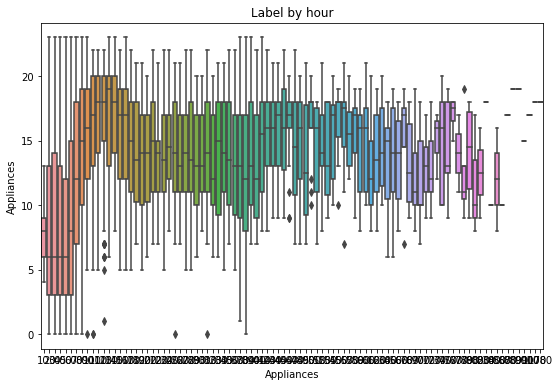

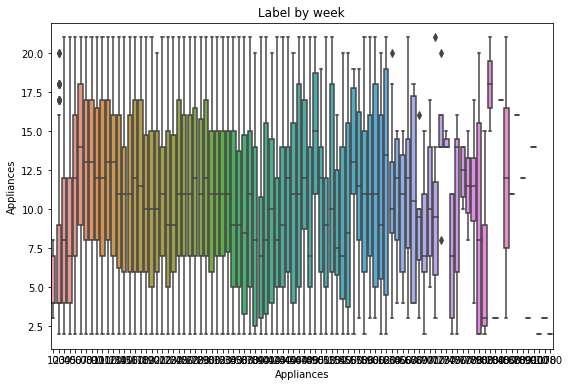

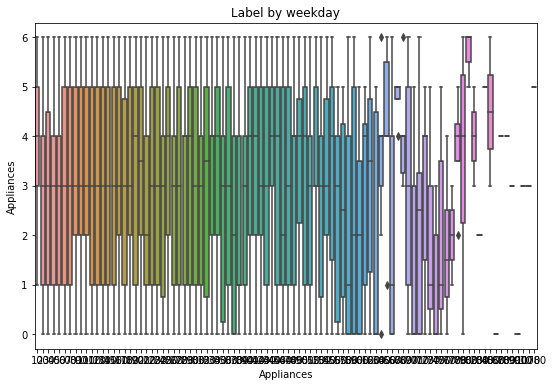

In [29]:
#Checking Outliers
for col in energy_df.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(energy_df['Appliances'], energy_df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()

#Outliers Analysis

In [251]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
outliers.sum()

Appliances     745320.000000
T1              11161.526667
RH_1             7277.069948
T2              14632.987558
RH_2             8113.056218
T3               6036.660695
RH_3              622.190000
T4               3291.922619
T6              12805.173720
RH_6                0.000000
T7                 51.963333
RH_7             2133.342222
T8               1177.889444
RH_8              992.500556
RH_9              712.588333
T_out            9812.633333
Press_mm_hg    160563.700000
RH_out           7862.500000
Windspeed        2488.833333
hour                0.000000
dtype: float64

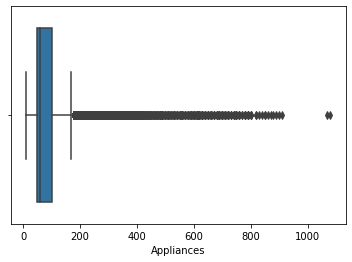

In [252]:
#Checking outliers for Dependent variable using boxplot
sns.boxplot(energy_df['Appliances'])

We can see that there are lot of outliers present in the dataset

In [253]:
#Using Iqr method to reduce outliers
percentile_q1 = np.percentile(energy_df['Appliances'],25)
print(percentile_q1)
percentile_q2 = np.percentile(energy_df['Appliances'],50)
print(percentile_q2)
percentile_q3 = np.percentile(energy_df['Appliances'],75)
print(percentile_q3)

50.0
60.0
100.0


In [254]:
iq_range = percentile_q3 - percentile_q1
iq_range

50.0

In [255]:
upper = percentile_q3+1.5*iq_range
lower = percentile_q1-1.5*iq_range
print(upper,lower)

175.0 -25.0


In [256]:
energy_df = energy_df[(energy_df['Appliances']<=upper)]


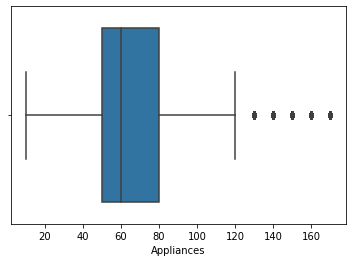

In [257]:
sns.boxplot(energy_df['Appliances'])

In [258]:
energy_df.shape

(17597, 20)

By the above box plot we can see some outliers have been removed so we will do the same for other columns

Now checking outliers for other columns

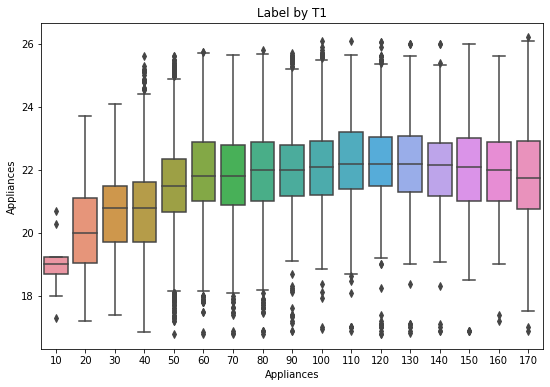

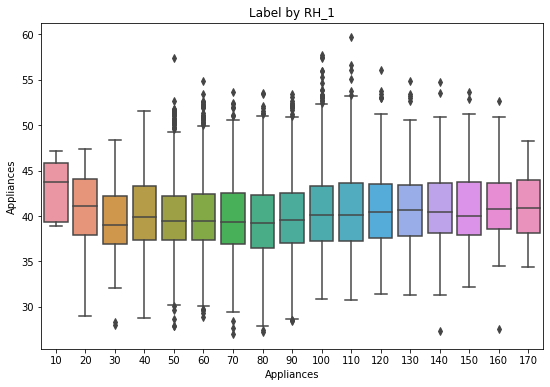

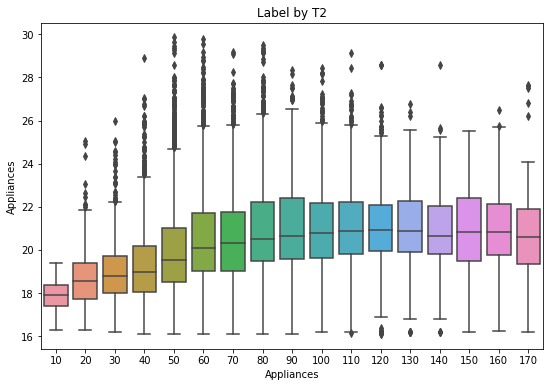

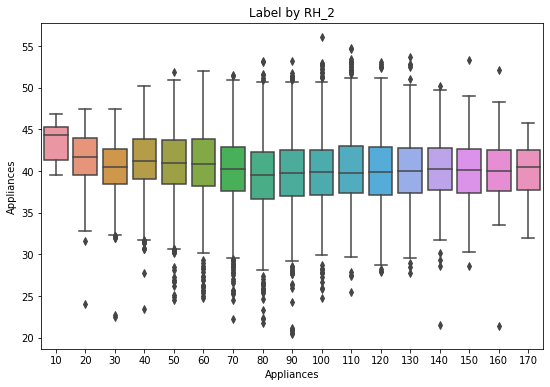

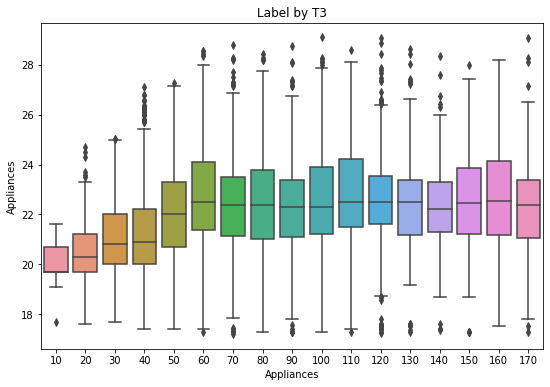

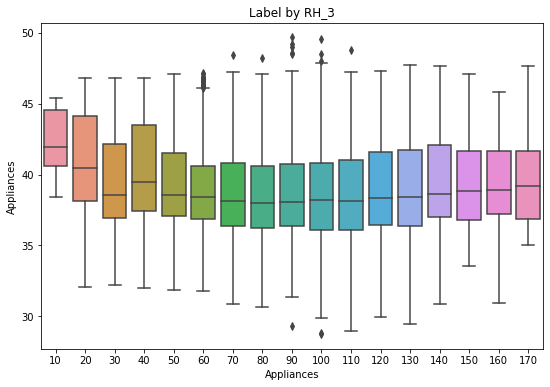

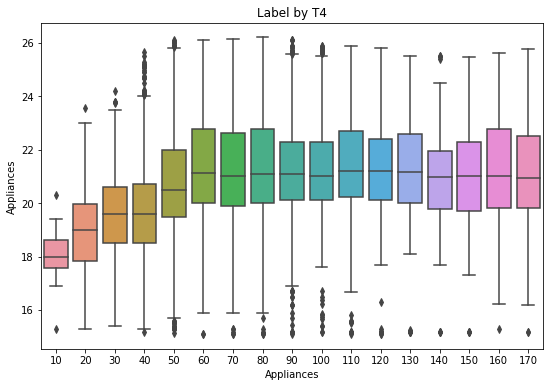

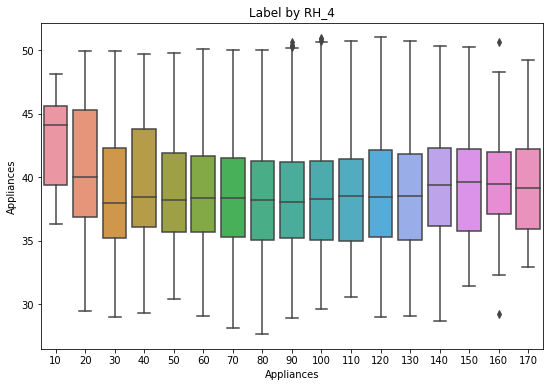

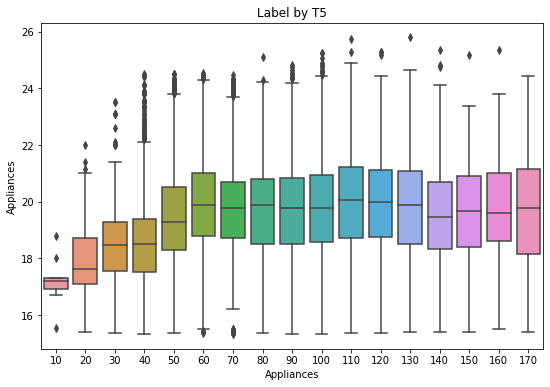

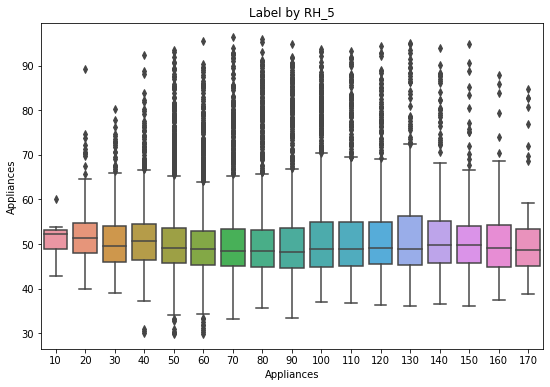

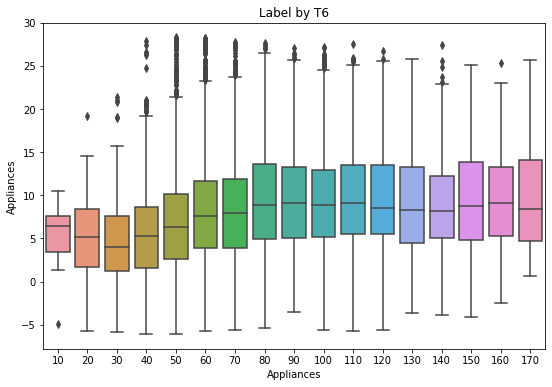

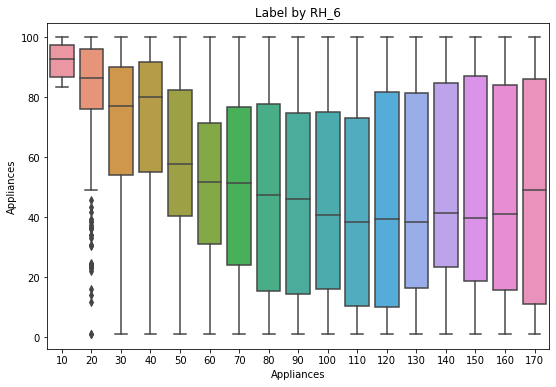

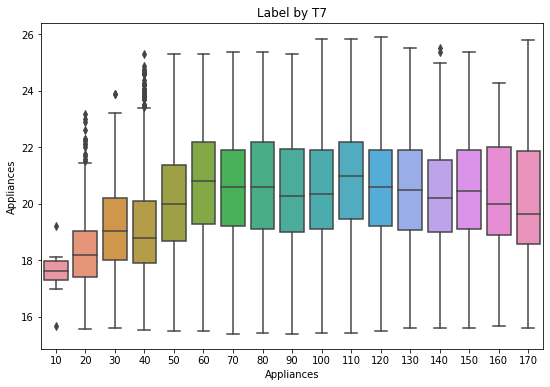

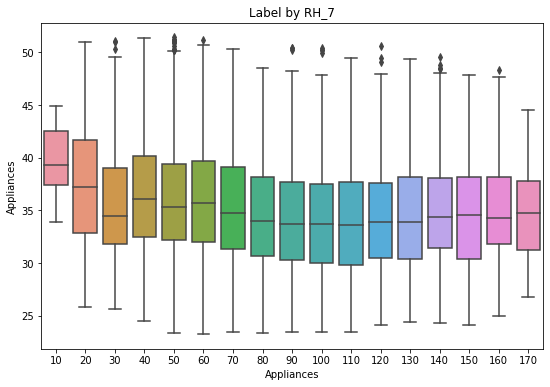

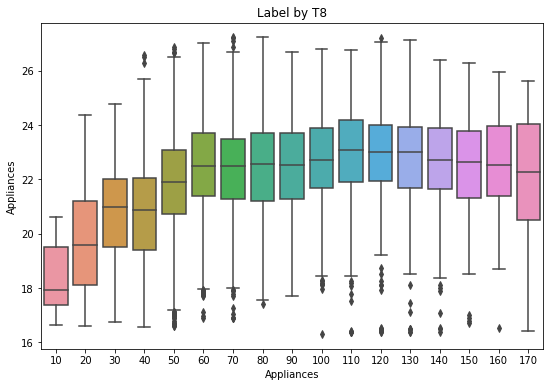

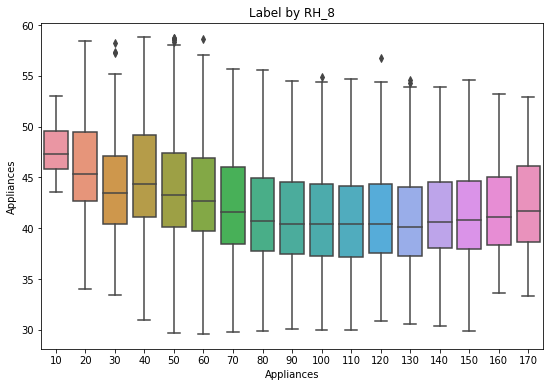

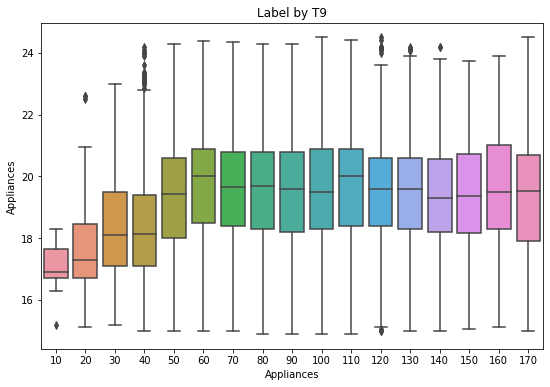

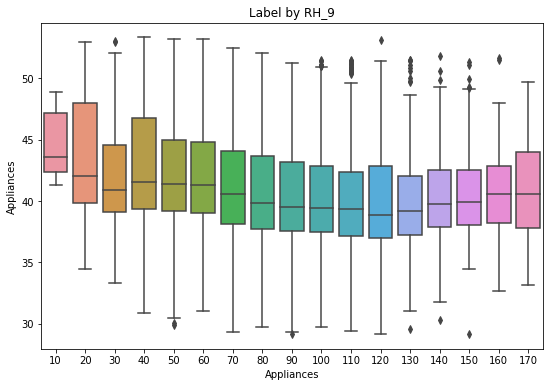

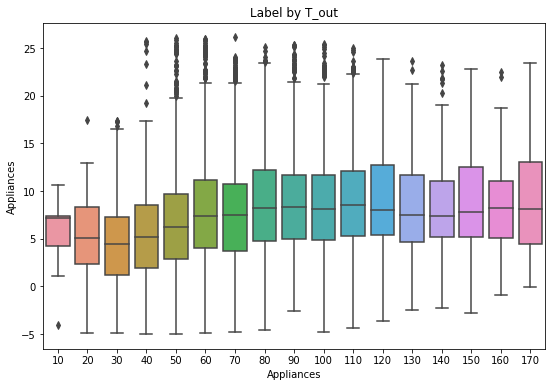

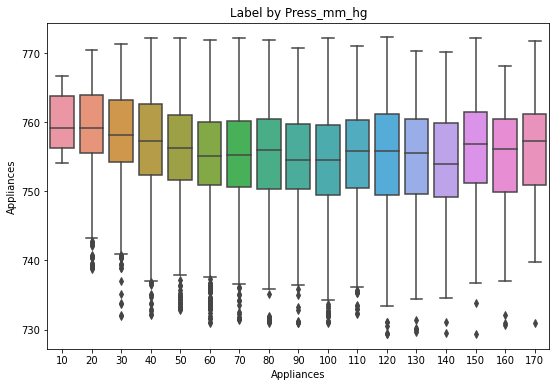

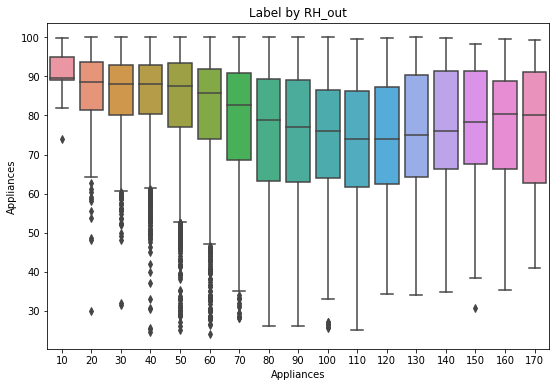

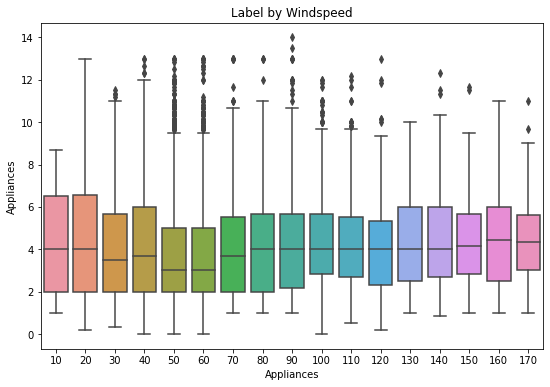

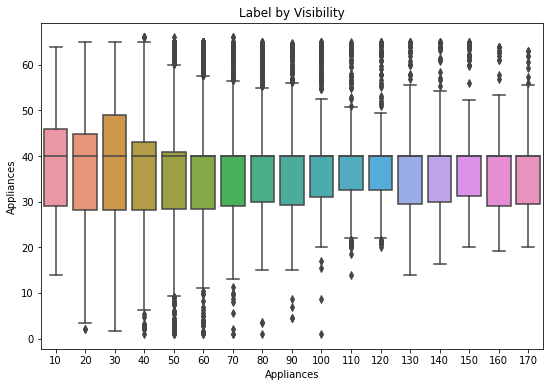

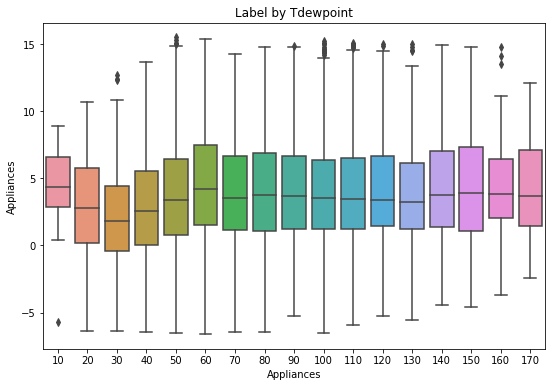

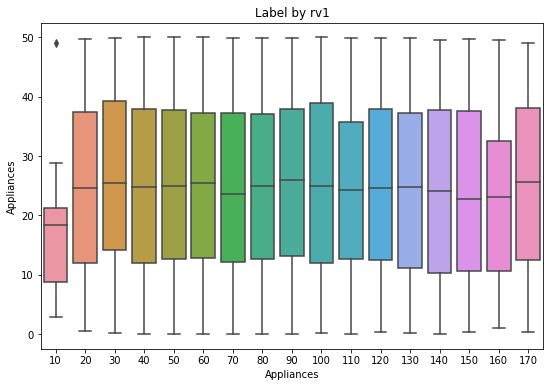

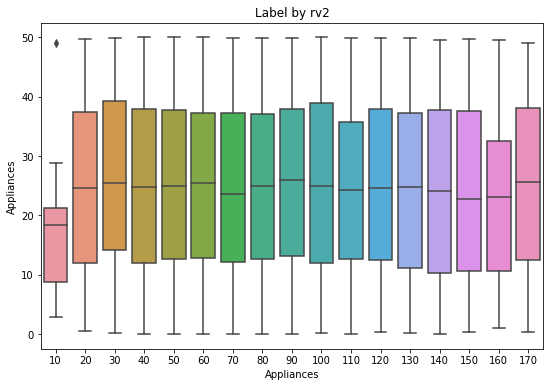

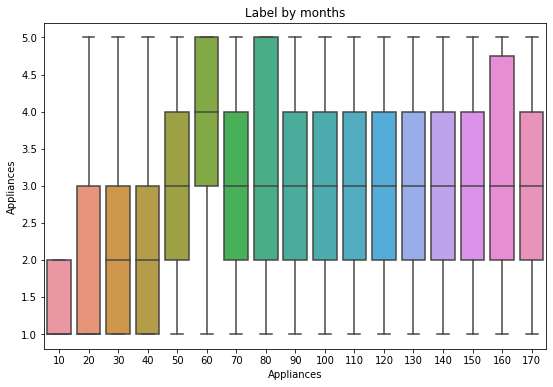

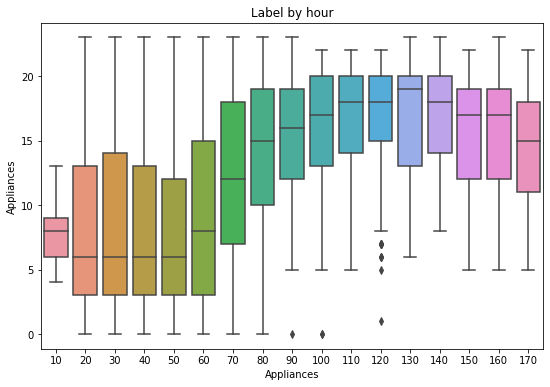

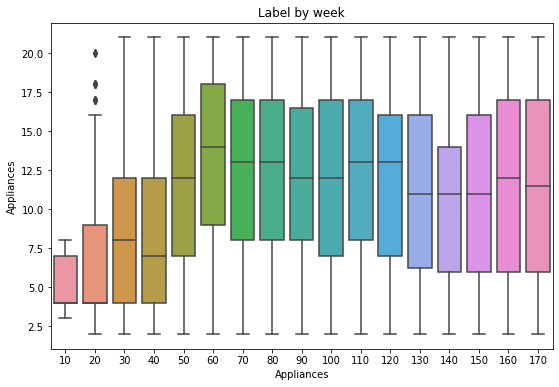

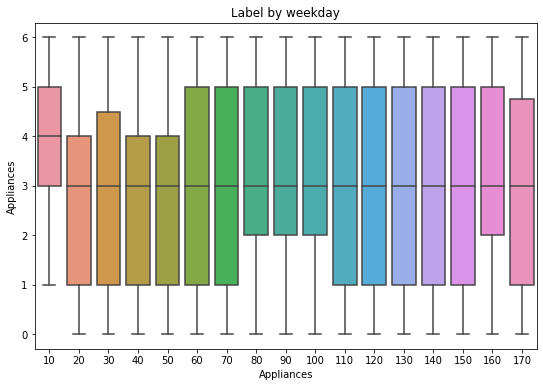

In [ ]:
#Plot a boxplot for the label by each column
for col in energy_df.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(energy_df['Appliances'], energy_df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()

#Split Train and Test Data

In [259]:
X = energy_df.drop(columns=['Appliances'])
y = energy_df[['Appliances']]

In [51]:
X

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
...          ...        ...        ...        ...        ...        ...   
19727  25.500000  47.456667  26.000000  42.320000  27.663333  40.693333   
19728  25.600000  47.193333  25.968571  42.528571  27.390000  41.030000   
19729  25.533333  46.860000  25.978000  42.534000  27.323333  41.090000   
19730  25.566667  46.560000  25.890000  42.025714  27.200000  41.163333   
19731  25.500000  46.500000  25.754000  42.080000  27.133333  41.223333   

              T4       RH_4         T5       RH_5  ...     RH_out  Windspeed  \
0      19.000000  45.566667  17.166667  55.200000  ...  92.000000   7.000000   
1      19.000000  45.992500  17.166667  55.200000  ...  92.000000   6.666667   
2      18.926667  45.890000  17.166667  55.090000  ...  92.000000   6.333333   
3      18.890000  45.723333  17.166667  55.090000  ...  92.000000   6.000000   
4      18.890000  45.530000  17.200000  55.090000  ...  92.000000   5.666667   
...          ...        ...        ...        ...  ...        ...        ...   
19727  24.700000  45.560000  23.200000  52.126667  ...  55.000000   2.833333   
19728  24.700000  45.626667  23.200000  52.260000  ...  55.000000   3.000000   
19729  24.700000  45.626667  23.200000  52.326667  ...  55.333333   3.166667   
19730  24.700000  45.590000  23.200000  52.400000  ...  55.666667   3.333333   
19731  24.700000  45.590000  23.230000  52.326667  ...  56.000000   3.500000   

       Visibility  Tdewpoint        rv1        rv2  months  hour  week  \
0       63.000000   5.300000  13.275433  13.275433       1    17     2   
1       59.166667   5.200000  18.606195  18.606195       1    17     2   
2       55.333333   5.100000  28.642668  28.642668       1    17     2   
3       51.500000   5.000000  45.410389  45.410389       1    17     2   
4       47.666667   4.900000  10.084097  10.084097       1    17     2   
...           ...        ...        ...        ...     ...   ...   ...   
19727   22.166667  13.366667   1.796395   1.796395       5    16    21   
19728   22.000000  13.400000  18.248201  18.248201       5    17    21   
19729   22.833333  13.366667  16.966162  16.966162       5    17    21   
19730   23.666667  13.333333  43.096812  43.096812       5    17    21   
19731   24.500000  13.300000  49.282940  49.282940       5    17    21   

       weekday  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
19727        4  
19728        4  
19729        4  
19730        4  
19731        4  

[17597 rows x 30 columns]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [261]:
#Scale the data
object = StandardScaler() 
X_train_scale = object.fit_transform(X_train)
X_test_scale =  object.transform(X_test)

In [262]:
X_train

T1       RH_1         T2       RH_2         T3       RH_3  \
10424  21.89  38.790000  19.323333  41.290000  22.390000  39.000000   
9867   21.10  36.200000  18.290000  39.290000  22.200000  36.590000   
12787  21.39  42.193333  21.426667  39.326667  22.166667  37.966667   
2801   20.70  42.200000  19.700000  41.790000  21.000000  44.500000   
8487   21.00  36.290000  20.100000  35.433333  20.500000  36.590000   
...      ...        ...        ...        ...        ...        ...   
10473  21.20  39.790000  18.700000  43.466667  22.000000  38.000000   
14844  23.10  39.166667  21.000000  40.193333  23.600000  33.163333   
11190  21.79  38.500000  19.730000  41.560000  22.856667  37.260000   
12230  22.20  41.266667  21.133333  40.590000  24.000000  36.290000   
3153   21.79  48.796667  21.200000  47.526667  22.390000  46.090000   

              T4         T6       RH_6         T7       RH_7         T8  \
10424  21.323333   6.433333  54.590000  20.500000  37.760000  22.790000   
9867   20.200000   5.300000  43.230000  19.200000  30.500000  22.000000   
12787  20.600000  14.860000   7.266667  21.290000  33.795714  22.566667   
2801   18.100000   3.863333  99.263333  17.000000  39.700000  20.285000   
8487   21.700000  10.630000  22.563333  20.533333  29.356667  21.200000   
...          ...        ...        ...        ...        ...        ...   
10473  21.200000   9.063333  46.693333  20.200000  35.863333  21.890000   
14844  22.500000   8.000000   1.000000  21.956000  25.160000  23.790000   
11190  20.230000   9.245000  45.877222  20.790000  33.560000  23.183333   
12230  21.290000  16.230000  10.130000  22.290000  35.663333  23.926667   
3153   20.700000   8.600000  99.090000  18.700000  44.127778  20.000000   

            RH_8       RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
10424  46.530000  40.872500   5.566667   756.666667  91.000000   1.000000   
9867   41.090000  39.900000   4.850000   761.500000  78.000000   3.500000   
12787  38.156667  39.793333  11.250000   750.150000  63.666667   6.166667   
2801   52.529444  49.326667   4.333333   754.883333  90.166667   4.000000   
8487   35.230000  40.730000   9.850000   759.300000  54.500000   1.500000   
...          ...        ...        ...          ...        ...        ...   
10473  41.500000  39.933333   7.400000   756.900000  75.500000   2.500000   
14844  32.933333  35.193333   8.500000   757.800000  47.000000   9.000000   
11190  42.961111  39.863333   7.300000   750.300000  75.000000   8.000000   
12230  39.790000  43.590000  13.466667   751.300000  64.333333   4.333333   
3153   50.438889  50.833333   7.850000   756.150000  93.000000   5.500000   

       hour  
10424     2  
9867      5  
12787    12  
2801      3  
8487     15  
...     ...  
10473    10  
14844    19  
11190    10  
12230    15  
3153     14  

[14077 rows x 19 columns]

In [263]:
y_train

Appliances
10424          60
9867           50
12787         100
2801           40
8487           50
...           ...
10473          60
14844         120
11190          80
12230          90
3153           60

[14077 rows x 1 columns]

In [264]:
print(X_train.shape)
print(X_test.shape)

(14077, 19)
(3520, 19)


#Fitting the multiple models

#Linear Regression

In [265]:
reg = LinearRegression().fit(X_train, y_train)

In [266]:
reg.score(X_train,y_train)

0.31156338413426765

In [267]:
reg.coef_

array([[ 5.62835865,  5.4263998 , -4.96872856, -3.32295321,  0.5535088 ,
        -0.30034296, -0.21716508,  1.67826411,  0.05835374, -6.16826644,
         0.84533224,  7.38995191, -1.84321812, -1.16144653, -1.47148529,
         0.02697306, -0.09063021,  0.7499813 ,  0.73078614]])

In [268]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 556.1566602282521
MSE on test is 545.3033586928348
RMSE on train is 23.582973947919548
RMSE on test is 23.351731385334894
Training MAE: 17.33
Test MAE: 17.34
R2 train : 0.31156338413426765
R2 test : 0.3382418066185079
Adjusted R2 train :  0.3106328658372307
Adjusted R2 test :  0.3346494049972941


#Lasso Regression

In [269]:
lasso = Lasso(alpha = 0.001, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [270]:
lasso.score(X_train, y_train)

0.31156331075095633

In [271]:
#predicting the values for train and test set
y_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 556.1567195112949
MSE on test is 545.2997922149316
RMSE on train is 23.58297520482297
RMSE on test is 23.351655020895876
Training MAE: 17.33
Test MAE: 17.34
R2 train : 0.31156331075095633
R2 test : 0.338246134752447
Adjusted R2 train :  0.3106327923547316
Adjusted R2 test :  0.3346537566268175


#Ridge Regression 

In [272]:
Ridge  = Ridge(alpha=0.001 , max_iter= 3000)
Ridge.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=3000)

In [273]:
Ridge.score(X_train, y_train)

0.31156338413425944

In [274]:
#predicting the values for train and test set
y_pred = Ridge.predict(X_train)
y_test_pred = Ridge.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 556.1566602282588
MSE on test is 545.3033584118791
RMSE on train is 23.58297394791969
RMSE on test is 23.35173137931916
Training MAE: 17.33
Test MAE: 17.34
R2 train : 0.31156338413425944
R2 test : 0.33824180695946426
Adjusted R2 train :  0.3106328658372225
Adjusted R2 test :  0.33464940534010146


#Polynomial Regression

In [275]:
#Polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [276]:
lin2.score(X_poly, y_train)

0.6942630399890846

In [277]:
#predicting the values for train and test set
y_pred = lin2.predict(X_poly)
y_test_pred = lin2.predict(X_poly_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 246.99099767402885
MSE on test is 323.65917955127924
RMSE on train is 15.715947240749724
RMSE on test is 17.99053027432152
Training MAE: 11.28
Test MAE: 12.91
R2 train : 0.6942630399890846
R2 test : 0.6072202554471358
Adjusted R2 train :  0.6938497937601447
Adjusted R2 test :  0.6050880225481345


#Decision Tree

In [278]:
#implementing DecisionTree regression
#tree1 = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=10)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=10)

In [279]:
#predicting the values for train and test set
y_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 483.70591246435026
MSE on test is 492.6478427315574
RMSE on train is 21.993315176761104
RMSE on test is 22.195671711654896
Training MAE: 15.68
Test MAE: 16.04
R2 train : 0.40124629395872624
R2 test : 0.4021424200268571
Adjusted R2 train :  0.4004369946477222
Adjusted R2 test :  0.39889690744986006


#Random Forest

In [280]:
#implementing RandomForest
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=10)

In [281]:
#predicting the values for train and test set
y_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 33.39847907934929
MSE on test is 234.52589772727273
RMSE on train is 5.779141725148233
RMSE on test is 15.314238398538555
Training MAE: 3.86
Test MAE: 10.46
R2 train : 0.9586578071311539
R2 test : 0.7153888163219708
Adjusted R2 train :  0.9586019273798194
Adjusted R2 test :  0.7138437841820044


#GradientBoostingRegression

In [282]:
#implementing GradientBoostingRegression
# create regressor object
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
gdb.fit(X_train, y_train) 

GradientBoostingRegressor(random_state=10)

In [283]:
#predicting the values for train and test set
y_pred = gdb.predict(X_train)
y_test_pred = gdb.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 364.8181384137649
MSE on test is 378.7576514583946
RMSE on train is 19.10021304629257
RMSE on test is 19.46169703439026
Training MAE: 13.64
Test MAE: 14.11
R2 train : 0.548411117628381
R2 test : 0.5403549690958147
Adjusted R2 train :  0.5478007321432092
Adjusted R2 test :  0.5378597532137634


#XGB Regression

In [284]:
from xgboost import XGBRegressor
#Implementing XGB Regression
#create regressor object
xgb = XGBRegressor(n_estimators = 100, random_state = 10)
 
#Fit the regressor
xgb.fit(X_train, y_train) 

[14:01:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=10)

In [285]:
#predicting the values for train and test set
y_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 366.3115508986905
MSE on test is 377.7543741676209
RMSE on train is 19.139267250829914
RMSE on test is 19.435904253921937
Training MAE: 13.63
Test MAE: 14.05
R2 train : 0.5465625021019719
R2 test : 0.5415725060077358
Adjusted R2 train :  0.5459496179545675
Adjusted R2 test :  0.5390838996117778


#LGBM Regression

In [286]:
#implementing LGBM Regression
# create regressor object
lgbm = LGBMRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
lgbm.fit(X_train, y_train) 

LGBMRegressor(random_state=10)

In [287]:
#predicting the values for train and test set
y_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 214.81236476282643
MSE on test is 281.3817366178967
RMSE on train is 14.656478593537617
RMSE on test is 16.77443699853729
Training MAE: 10.33
Test MAE: 11.81
R2 train : 0.7340952504592102
R2 test : 0.6585264574178151
Adjusted R2 train :  0.7337358430293692
Adjusted R2 test :  0.6566727439009404


#Cross Validation and Hyperparameter Tuning

In [290]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge


In [291]:
reg = LinearRegression()
lasso  = Lasso(alpha=0.001 , max_iter= 3000,random_state=10)
Ridge = Ridge(alpha=0.001 , max_iter= 3000)
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)

In [292]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

#Lasso

In [293]:
#Cross Validation and Hyperparametertuning
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=246310.2685168132; total time=   0.0s
[CV] END ............................alpha=246310.2685168132; total time=   0.0s
[CV] END ............................alpha=246310.2685168132; total time=   0.0s
[CV] END ............................alpha=246310.2685168132; total time=   0.0s
[CV] END ............................alpha=246310.2685168132; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................alpha=0.011758993080607898; total time=   0.2s
[CV] END .........................alpha=0.011758993080607898; total time=   0.2s
[CV] END .........................alpha=0.011758993080607898; total time=   0.3s
[CV] END .........................alpha=0.011758993080607898; total time=   0.3s
[CV] END .........................alpha=0.011758993080607898; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5,
              estimator=Lasso(alpha=0.001, max_iter=3000, random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [294]:
lr_bayes.best_estimator_

Lasso(alpha=4.018566854347369e-06, max_iter=3000, random_state=10)

In [295]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.3115633841330826
Test R2 score :  0.33824182430510463


#Ridge

In [296]:
from sklearn.linear_model import Ridge
from skopt import BayesSearchCV
Ridge = Ridge(alpha= 0.001, max_iter=3000)

In [297]:
#Cross validation and hyperparameter tuning
bayes= BayesSearchCV(estimator=Ridge,
                     search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                     cv = 5, verbose=2, scoring='r2', n_iter=10)

bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=0.00024828290128881697; total time=   0.0s
[CV] END .......................alpha=0.00024828290128881697; total time=   0.0s
[CV] END .......................alpha=0.00024828290128881697; total time=   0.0s
[CV] END .......................alpha=0.00024828290128881697; total time=   0.0s
[CV] END .......................alpha=0.00024828290128881697; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................alpha=0.007780134473448178; total time=   0.0s
[CV] END .........................alpha=0.007780134473448178; total time=   0.0s
[CV] END .........................alpha=0.007780134473448178; total time=   0.0s
[CV] END .........................alpha=0.007780134473448178; total time=   0.0s
[CV] END .........................alpha=0.007780134473448178; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(alpha=0.001, max_iter=3000), n_iter=10,
              scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [298]:
bayes.best_estimator_

Ridge(alpha=0.43682479512960704, max_iter=3000)

In [300]:
#r2 of test and train
print('Train R2 square : ', bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.31156338255785565
Test R2 score :  0.33824195372133015


#DecisionTreeRegression

In [301]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=tree1,
                        search_spaces = {
                          "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.1s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.1s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.1s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.1s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=log2, max_leaf_nodes=70, min_samples_lea

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                             'max_features': ['auto', 'log2', 'sqrt', None],
                             'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,
                                                70, 80, 90],
                             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10],
                             'splitter': ['best', 'random']},
              verbose=2)

In [302]:
lr_bayes.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, random_state=10)

In [303]:
#r2 of test and train
print('Train R2 score: ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 score:  0.5022301513066383
Test R2 score :  0.48609511375236303


#Random Forest

In [304]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':[4,6,8,10,12] ,
                          'min_samples_leaf': [10,30,40,50,60,80],
                          'min_samples_split': [50,80,100,150,200],
                          'n_estimators': [30,50,80,100,120,150]
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, min_samples_leaf=30, min_samples_split=200, n_estimators=120; total time=  11.9s
[CV] END max_depth=12, min_samples_leaf=30, min_samples_split=200, n_estimators=120; total time=   9.3s
[CV] END max_depth=12, min_samples_leaf=30, min_samples_split=200, n_estimators=120; total time=   9.3s
[CV] END max_depth=12, min_samples_leaf=30, min_samples_split=200, n_estimators=120; total time=   9.2s
[CV] END max_depth=12, min_samples_leaf=30, min_samples_split=200, n_estimators=120; total time=   9.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.0s
[CV] END max_depth=6, min_samples_leaf=40, min_sample

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [4, 6, 8, 10, 12],
                             'min_samples_leaf': [10, 30, 40, 50, 60, 80],
                             'min_samples_split': [50, 80, 100, 150, 200],
                             'n_estimators': [30, 50, 80, 100, 120, 150]},
              verbose=2)

In [305]:
lr_bayes.best_estimator_

RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=50,
                      n_estimators=50, random_state=10)

In [306]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.6915315830247206
Test R2 score :  0.6304688674230345


#GradientBoostingRegressor

In [307]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                           'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                            "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,50),
                          'min_samples_split': Integer(50,100),
                          'n_estimators': Integer(10,30)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=90, n_estimators=19; total time=   1.4s
[CV] END criterion=friedman_mse, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=90, n_estimators=19; total time=   1.4s
[CV] END criterion=friedman_mse, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=90, n_estimators=19; total time=   1.4s
[CV] END criterion=friedman_mse, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=90, n_estimators=19; total time=   1.4s
[CV] END criterion=friedman_mse, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=90, n_estimators=19; total time=   1.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=huber, max_depth=4, min_samples_leaf=39, min_samples_split=53, n_estimators=16; total time=   1.2s
[CV] END criterion=squared_error, loss=huber, max_depth=4, 

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['squared_error', 'absolute_error',
                                      'huber', 'quantile'],
                             'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=30, prior='uniform', transform='normalize')},
              verbose=2)

In [308]:
lr_bayes.best_estimator_

GradientBoostingRegressor(criterion='squared_error', loss='huber', max_depth=5,
                          min_samples_leaf=13, min_samples_split=96,
                          n_estimators=24, random_state=10)

In [309]:
#r2 of test and train
print('Train R2 score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 score :  0.5266078955130132
Test R2 score :  0.5136554332162011


#XGB Regression

In [310]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': [4,6,8,12],
                          'min_samples_split' :[50,100,150,200],
                          'n_estimators': [50,80,100],
                          'min_samples_leaf' : [40,50,70]
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[14:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   3.4s
[14:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   2.6s
[14:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   2.6s
[14:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   2.6s
[14:28:19] WARNING: /work

BayesSearchCV(cv=5, estimator=XGBRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [4, 6, 8, 12],
                             'min_samples_leaf': [40, 50, 70],
                             'min_samples_split': [50, 100, 150, 200],
                             'n_estimators': [50, 80, 100]},
              verbose=2)

In [311]:
lr_bayes.best_estimator_

XGBRegressor(max_depth=12, min_samples_leaf=50, min_samples_split=50,
             n_estimators=80, random_state=10)

In [312]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.9432979864824707
Test R2 score :  0.7050420310996388


#LGBM Regression

In [313]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lgbm ,
                           search_spaces = {
                            'max_depth': Integer(4,20),
                          'num_leaves': Integer(10,80),
                         'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......max_depth=18, n_estimators=83, num_leaves=35; total time=   0.8s
[CV] END .......max_depth=18, n_estimators=83, num_leaves=35; total time=   0.8s
[CV] END .......max_depth=18, n_estimators=83, num_leaves=35; total time=   1.7s
[CV] END .......max_depth=18, n_estimators=83, num_leaves=35; total time=   0.8s
[CV] END .......max_depth=18, n_estimators=83, num_leaves=35; total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......max_depth=11, n_estimators=55, num_leaves=38; total time=   0.6s
[CV] END .......max_depth=11, n_estimators=55, num_leaves=38; total time=   0.6s
[CV] END .......max_depth=11, n_estimators=55, num_leaves=38; total time=   0.6s
[CV] END .......max_depth=11, n_estimators=55, num_leaves=38; total time=   0.6s
[CV] END .......max_depth=11, n_estimators=55, num_leaves=38; total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=10, high=80, prior='uniform', transform='normalize')},
              verbose=2)

In [314]:
lr_bayes.best_estimator_

LGBMRegressor(max_depth=14, n_estimators=61, num_leaves=70, random_state=10)

In [315]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.7745200502538725
Test R2 score :  0.6759553656695076


In [316]:
from sklearn.linear_model import Ridge

In [317]:
models = [
           ['LinearRegression: ', LinearRegression()],
           ['Lasso: ', Lasso(alpha=4.018566854347369e-06, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge(alpha=0.43682479512960704, max_iter=3000)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, random_state=10)],
           ['RandomForest ',RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=50,
                      n_estimators=50, random_state=10)],
           ['GradientBoostingRegression: ', GradientBoostingRegressor(criterion='squared_error', loss='huber', max_depth=5,
                          min_samples_leaf=13, min_samples_split=96,
                          n_estimators=24, random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(max_depth=12, min_samples_leaf=50, min_samples_split=50,
             n_estimators=80, random_state=10)],
           ['LGBMRegressor: ',LGBMRegressor(max_depth=14, n_estimators=61, num_leaves=70, random_state=10)]
         ]


In [319]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[14:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [320]:
model_data = pd.DataFrame(model_data)

In [351]:
model_data

Name  MAE_train   MAE_test  R2_Score_train  \
0            LinearRegression:   17.328550  17.337933        0.311563   
1                       Lasso:   17.328550  17.337934        0.311563   
2                       Ridge:   17.328572  17.337958        0.311563   
3       DecisionTreeRegresson:   14.332334  14.839669        0.502230   
4                 RandomForest   10.978802  12.304211        0.691532   
5  GradientBoostingRegression:   13.589025  14.140594        0.526608   
6                XGBRegressor:    4.877454  10.659878        0.943298   
7               LGBMRegressor:    9.509959  11.428566        0.774520   

   R2_Score_test  RMSE_Score_train  RMSE_Score_test  
0       0.338242         23.582974        23.351731  
1       0.338242         23.582974        23.351731  
2       0.338242         23.582974        23.351729  
3       0.486095         20.053071        20.578362  
4       0.630469         15.785994        17.449980  
5       0.513655         19.555868        20.018957  
6       0.705042          6.768085        15.590121  
7       0.675955         13.496481        16.340745

In [352]:
##installing package
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.7 MB/s 


In [353]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

In [354]:
X_train1=pd.DataFrame(X_train)
X_test1=pd.DataFrame(X_test)

In [355]:
#lgbm regressor
lgbm = LGBMRegressor(max_depth=18, n_estimators=90, num_leaves=76, random_state=10)
 
# fit the regressor with x and y data
lgbm=lgbm.fit(X_train, y_train) 

In [356]:
# Define a tree explainer for the built model
lgbm_model=lr_bayes.best_estimator_
explainer = shap.TreeExplainer(lgbm)

In [357]:
# Obtain a Scatter Summary Plot 
explainer_train = shap.TreeExplainer(lgbm_model)
shap_values_train = explainer_train.shap_values(X_train1)

In [358]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
explainer_train = shap.TreeExplainer(lgbm_model)
# obtain shap values for the first row of the test data
shap.force_plot(explainer_train.expected_value[0], shap_values_train[0], X_train1.iloc[0])

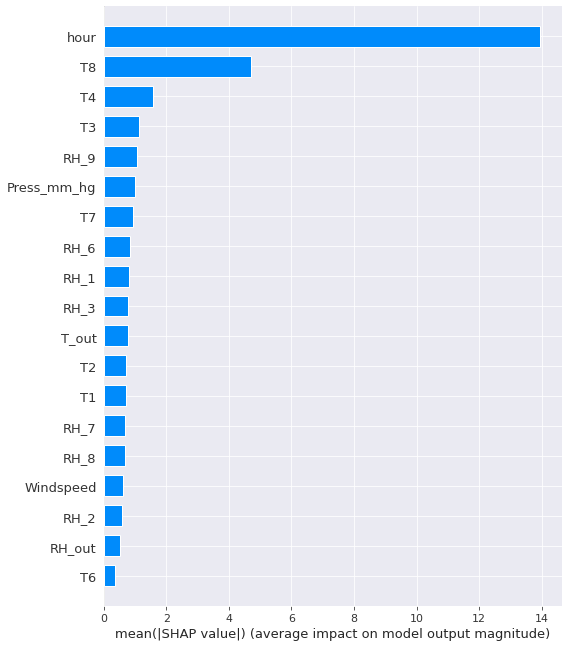

In [359]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="bar")

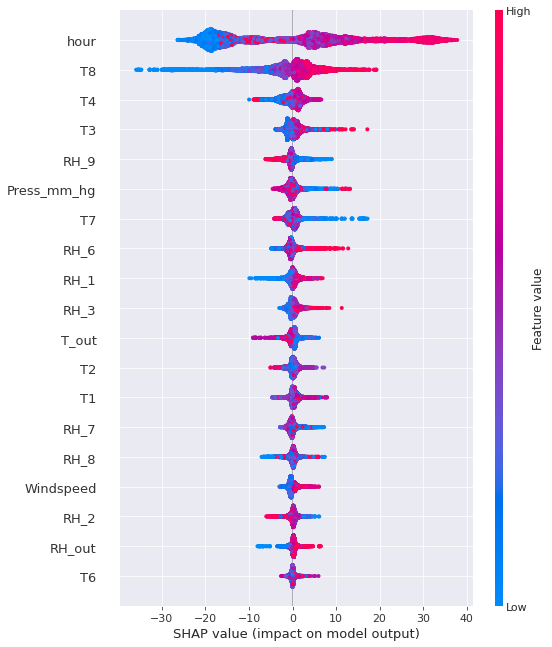

In [360]:
# Obtain a dot Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="dot")